## **Overview**
**we will explore how to develop a suite of different types of LSTM models for time series forecasting.**

* ### **Univariate LSTM Models**

1. Data Preparation
2. Vanilla LSTM
3. Stacked LSTM
4. Bidirectional LSTM
5. CNN LSTM
6. ConvLSTM


* ### **Multivariate LSTM Models**

* ### **Multi-Step LSTM Models**

* ### **Multivariate Multi-Step LSTM Models**



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
# from scikeras.wrappers import KerasRegressor # 回归神经网络

In [2]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
# univariate bidirectional lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
import keras.backend as K
import os
import glob

## Univariate LSTM Models
LSTMs can be used to model univariate time series forecasting problems.

These are problems comprised of a single series of observations and a model is required to learn from the series of past observations to predict the next value in the sequence.

We will demonstrate a number of variations of the LSTM model for univariate time series forecasting

## 1. CEEMDAN Data Preparation

In [3]:
# import os
# import glob
#
# csv_path = '../../Data/PreData/ArtiData'
# csv_files = glob.glob(os.path.join(csv_path, '*.csv'))
#
# start_index = 10  # 起始索引，即第4个文件
# end_index = 12  # 结束索引，即第6个文件（不包括第7个文件）
#
# for index, file in enumerate(csv_files[start_index:end_index]):
#     # LSTM_ALL(os.path.basename(file))
#     print(os.path.basename(file))
#     print("-------------------------")

IMF = []
xlsx_file = 'CEEMDAN_Data/IMF_13_R/NewTest'
xlsx_path = glob.glob(os.path.join(xlsx_file,'*.xlsx'))

data_col_len = pd.read_excel('CEEMDAN_Data/IMF_13_R/NewTest/CEEMDAN_Burlington Station_WL.xlsx')

for imf_len in range(len(data_col_len.columns)):
    for file in xlsx_path:
         print(file)
         # print(os.path.basename(file))
         imfs = pd.read_excel(file)
         imfn = imfs.iloc[:,imf_len]
         imfn.to_numpy()
         IMF.append(imfn)
    print(imf_len,"-------------------")

CEEMDAN_Data/IMF_13_R/NewTest\CEEMDAN_Burlington Station_AT.xlsx
CEEMDAN_Data/IMF_13_R/NewTest\CEEMDAN_Burlington Station_Baro.xlsx
CEEMDAN_Data/IMF_13_R/NewTest\CEEMDAN_Burlington Station_WD.xlsx
CEEMDAN_Data/IMF_13_R/NewTest\CEEMDAN_Burlington Station_WG.xlsx
CEEMDAN_Data/IMF_13_R/NewTest\CEEMDAN_Burlington Station_WL.xlsx
CEEMDAN_Data/IMF_13_R/NewTest\CEEMDAN_Burlington Station_WS.xlsx
0 -------------------
CEEMDAN_Data/IMF_13_R/NewTest\CEEMDAN_Burlington Station_AT.xlsx
CEEMDAN_Data/IMF_13_R/NewTest\CEEMDAN_Burlington Station_Baro.xlsx
CEEMDAN_Data/IMF_13_R/NewTest\CEEMDAN_Burlington Station_WD.xlsx
CEEMDAN_Data/IMF_13_R/NewTest\CEEMDAN_Burlington Station_WG.xlsx
CEEMDAN_Data/IMF_13_R/NewTest\CEEMDAN_Burlington Station_WL.xlsx
CEEMDAN_Data/IMF_13_R/NewTest\CEEMDAN_Burlington Station_WS.xlsx
1 -------------------
CEEMDAN_Data/IMF_13_R/NewTest\CEEMDAN_Burlington Station_AT.xlsx
CEEMDAN_Data/IMF_13_R/NewTest\CEEMDAN_Burlington Station_Baro.xlsx
CEEMDAN_Data/IMF_13_R/NewTest\CEEMDAN_Bu

### 结果绘制

In [4]:
def Result_Ana(Model, feature_num):
    print('Result_Ana_Function:',testX.shape)
    y_pred = Model.predict(testX)
    y_pred = np.array(y_pred).reshape(-1, 1)
    #将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将结果存储在prediction_copies_array数组中
    prediction_copies_array = np.repeat(y_pred, feature_num,axis=-1)
    #prediction_copies_array
    #prediction_copies_array.shape
    pred = scaler.inverse_transform(np.reshape(prediction_copies_array, (len(y_pred), feature_num)))[:,feature_num-1] #进行逆变换但是，只需要最后一列

    # print(pred)
    print('Result_Ana_Function2:',testY.shape)
    original_copies_array = np.repeat(testY, feature_num, axis=-1)
    print('IMF_True:',scaler.inverse_transform(np.reshape(original_copies_array, (len(testY), feature_num))))
    y_true = scaler.inverse_transform(np.reshape(original_copies_array, (len(testY), feature_num)))[:, feature_num-1]
    print('feature_num-1_waterl level_true:',y_true)
    # y_true = scaler.inverse_transform(np.array(testY).reshape(-1,1))

    y_true
    pred
    print(pred)
    plt.plot(y_true, color='red', label='Real Value')
    plt.plot(pred, color='blue', label='Pred Value')
    plt.title('Prediction Water Level(m)')
    plt.xlabel('Time (h)')
    plt.ylabel('Water Level(m)')
    plt.legend()
    # plt.savefig('../Images/SW_IN_F_Train_'+'n_past='+'{}'.format((trainX[1].shape)[0])+'_epochs={}'.format((grid_search.best_params_)['epochs'])+'.png',dpi=600)
    plt.show()
    # y_true_data = pd.DataFrame(y)
    # y_true_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_True' + '.csv',
    #               index=False)
    # pred_data = pd.DataFrame(pred)
    # pred_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_Pre' + '.csv',
    #              index=False)
    from sklearn.metrics import mean_squared_error as mse
    from sklearn.metrics import mean_absolute_error as mae
    from sklearn.metrics import r2_score as r2
    print('MSE:',mse(y_true,pred))
    print('MAE:',mae(y_true,pred))
    print('R²:',r2(y_true,pred))
    print('RMSE:',np.sqrt(mse(y_true,pred)))
    print('pred_finally:',pred)

    return y_true,pred

### LSTM

-------------------------- 0 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 0 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0595 - val_loss: 0.0111
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0132 - val_loss: 0.0074
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.0066
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0065
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0064
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.0064
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0064
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0064
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0066
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0067
Epoch 11/3

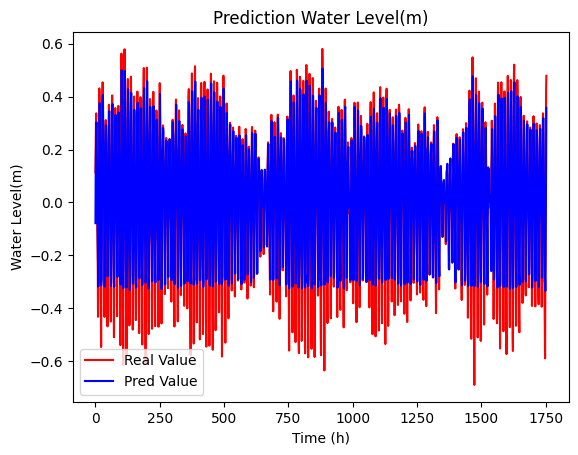

MSE: 0.01850269146703257
MAE: 0.12008785950002471
R²: 0.6915270731920946
RMSE: 0.13602459875710926
pred_finally: [-0.07869128  0.1201825   0.20889366 ... -0.0110078   0.25067702
  0.35750067]
prediction_result: [-0.07869128  0.1201825   0.20889366 ... -0.0110078   0.25067702
  0.35750067]
lstm_y_turs: [0.11360713 0.21314858 0.3050885  ... 0.25443378 0.42630158 0.47881946]
-------------------------- 1 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 1 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0398 - val_loss: 0.0111
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0075
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0055
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0056
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0057
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0058
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0054
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0054
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0054
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0054
Epoch 11/3

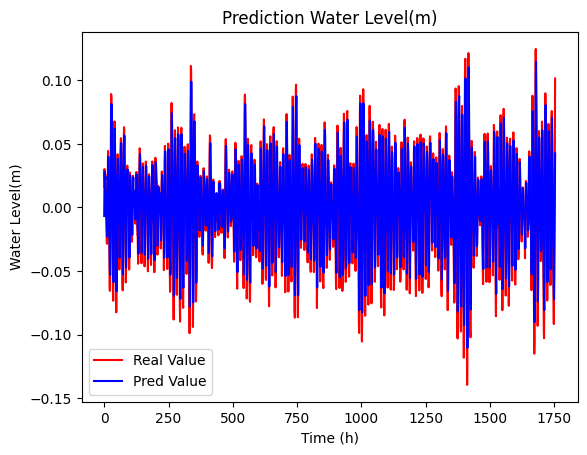

MSE: 0.00045308537145550935
MAE: 0.017838056783504894
R²: 0.7131138519335756
RMSE: 0.021285802109751686
pred_finally: [-0.00672989  0.01546787  0.02802544 ... -0.01256511  0.0111566
  0.04253253]
prediction_result: [-0.00672989  0.01546787  0.02802544 ... -0.01256511  0.0111566
  0.04253253]
lstm_y_turs: [0.01618017 0.03013167 0.02211249 ... 0.01143001 0.04727639 0.1013928 ]
-------------------------- 2 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 2 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0752 - val_loss: 0.0279
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0191 - val_loss: 0.0188
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0175 - val_loss: 0.0190
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.0190
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0175 - val_loss: 0.0191
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0176 - val_loss: 0.0188
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0175 - val_loss: 0.0187
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.0188
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.0193
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0175 - val_loss: 0.0188
Epoch 11/3

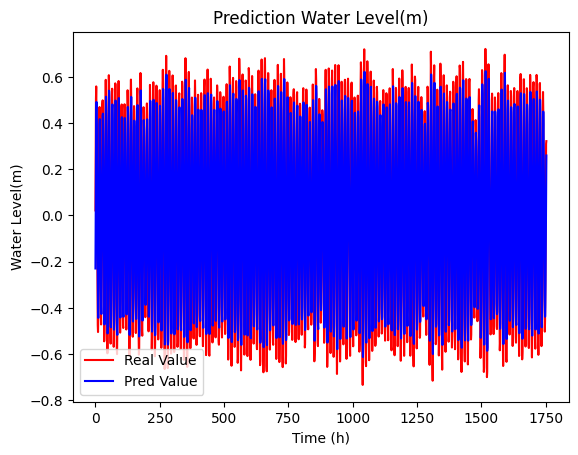

MSE: 0.04061869486036437
MAE: 0.17945685696810146
R²: 0.7604803511155582
RMSE: 0.20154080197410243
pred_finally: [-0.22957873 -0.00575313  0.26589173 ... -0.09593382  0.159021
  0.25993913]
prediction_result: [-0.22957873 -0.00575313  0.26589173 ... -0.09593382  0.159021
  0.25993913]
lstm_y_turs: [0.02204645 0.30776679 0.50702586 ... 0.18070221 0.31081457 0.32220905]
-------------------------- 3 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 3 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0480 - val_loss: 0.0116
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.0063
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.0061
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.0064
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0064
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.0062
Epoch 11/3

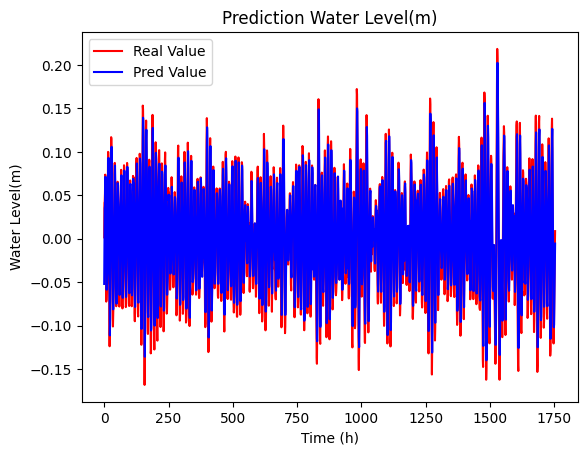

MSE: 0.0010834996319931192
MAE: 0.027954000889894363
R²: 0.7548053041094721
RMSE: 0.032916555591269256
pred_finally: [-0.05196154  0.00028484  0.03513284 ... -0.04669531 -0.02838834
 -0.00552768]
prediction_result: [-0.05196154  0.00028484  0.03513284 ... -0.04669531 -0.02838834
 -0.00552768]
lstm_y_turs: [ 0.00162487  0.0415722   0.0426443  ... -0.03505092 -0.00922992
  0.00881298]
-------------------------- 4 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 4 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 3ms/step - loss: 0.0423 - val_loss: 0.0075
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0026
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 9.7156e-04 - val_loss: 0.0020
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 9.6081e-04 - val_loss: 0.0020
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 9.5352e-04 - val_loss: 0.0019
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 9.4091e-04 - val_loss: 0.0020
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 9.4341e-04 - val_loss: 0.0020
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 9.6695e-04 - val_loss: 0.0022
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 9.4738e-04 -

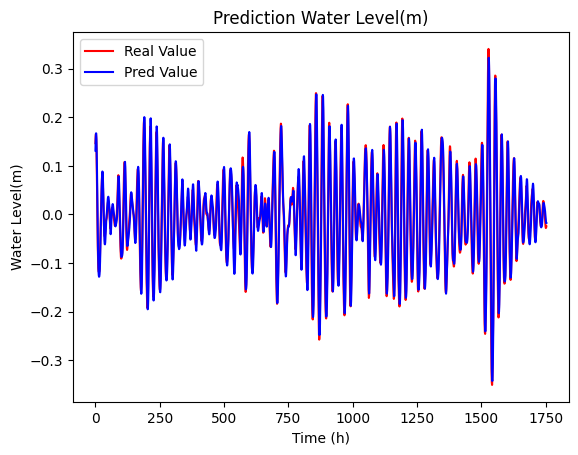

MSE: 0.0007272383282644502
MAE: 0.021798560410308105
R²: 0.9219425935515632
RMSE: 0.026967356716305183
pred_finally: [ 0.13133027  0.15426569  0.1667157  ... -0.01438853 -0.01770099
 -0.01743441]
prediction_result: [ 0.13133027  0.15426569  0.1667157  ... -0.01438853 -0.01770099
 -0.01743441]
lstm_y_turs: [ 0.14654971  0.16163307  0.16559117 ... -0.02793743 -0.02695628
 -0.02455443]
-------------------------- 5 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 5 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0360 - val_loss: 0.0091
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0083
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0070
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0053
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 6.4199e-04 - val_loss: 0.0031
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 2.6558e-04 - val_loss: 0.0014
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 1.0159e-04 - val_loss: 8.0327e-04
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 6.7458e-05 - val_loss: 5.9615e-04
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 5.7929e-05 - val_loss: 5.4585e-04
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 5.49

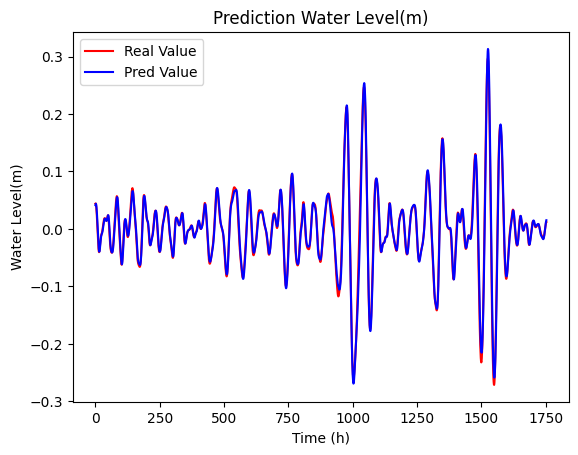

MSE: 7.508796040946511e-05
MAE: 0.005869250611037544
R²: 0.9856699549553775
RMSE: 0.00866533094633235
pred_finally: [0.04139806 0.04357537 0.04381011 ... 0.01086549 0.01364176 0.015199  ]
prediction_result: [0.04139806 0.04357537 0.04381011 ... 0.01086549 0.01364176 0.015199  ]
lstm_y_turs: [0.04406377 0.04447471 0.04276618 ... 0.01055452 0.01201398 0.01202596]
-------------------------- 6 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 6 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0332 - val_loss: 0.0090
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0076
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0061
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0045
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0030
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 5.8488e-04 - val_loss: 0.0016
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 2.4545e-04 - val_loss: 7.0605e-04
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 8.6675e-05 - val_loss: 3.8583e-04
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 4.1653e-05 - val_loss: 2.9461e-04
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 2.9985e-

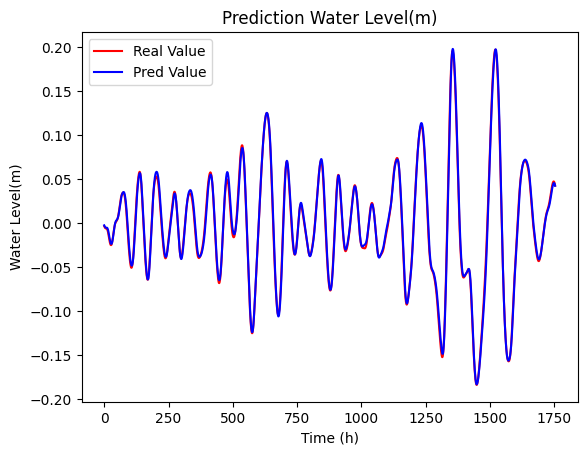

MSE: 1.5247234761419522e-05
MAE: 0.0031167381573391512
R²: 0.9965083112988832
RMSE: 0.0039047707693819263
pred_finally: [-0.00228558 -0.00294171 -0.0035348  ...  0.04490628  0.04397473
  0.04271488]
prediction_result: [-0.00228558 -0.00294171 -0.0035348  ...  0.04490628  0.04397473
  0.04271488]
lstm_y_turs: [-0.0032455  -0.00394057 -0.00454056 ...  0.04566027  0.04440912
  0.04284824]
-------------------------- 7 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 7 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0469 - val_loss: 0.0085
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0071
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0056
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0040
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 7.6508e-04 - val_loss: 0.0011
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 2.7416e-04 - val_loss: 3.8403e-04
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 7.6144e-05 - val_loss: 1.4776e-04
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 3.0108e-05 - val_loss: 8.7668e-05
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 1.9977e-

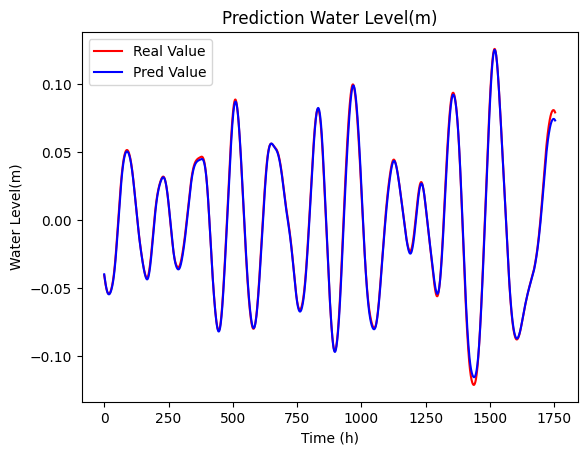

MSE: 5.599096593944115e-06
MAE: 0.0018002599609832184
R²: 0.9980968358595932
RMSE: 0.002366241026172971
pred_finally: [-0.03986031 -0.04124864 -0.04260888 ...  0.07406025  0.07375924
  0.07337907]
prediction_result: [-0.03986031 -0.04124864 -0.04260888 ...  0.07406025  0.07375924
  0.07337907]
lstm_y_turs: [-0.04046229 -0.04184348 -0.04318783 ...  0.08021263  0.07979667
  0.07929176]
-------------------------- 8 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 8 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0601 - val_loss: 0.0130
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 3.1744e-04 - val_loss: 2.7926e-04
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 1.0737e-04 - val_loss: 1.4953e-04
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 6.3267e-05 - val_loss: 1.2303e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 4.4328e-05 - val_loss: 1.0829e-04
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 3.3335e-05 - val_loss: 9.2191e-05
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 2.6139e-05 - val_loss: 7.6110e-05
Epoch 10/30
110/110 [==============================] - 0s 3ms/s

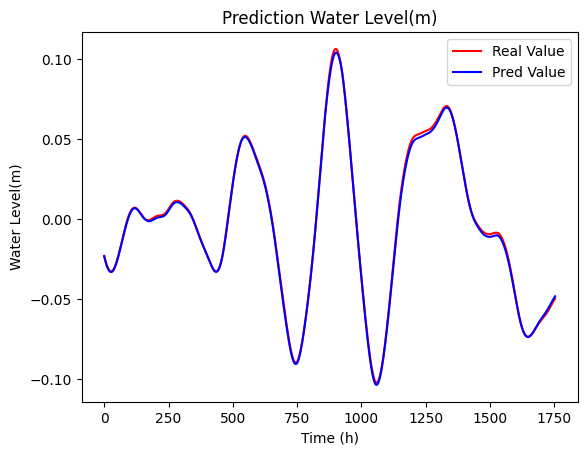

MSE: 1.5020098169586279e-06
MAE: 0.001002407382352519
R²: 0.9993397188408331
RMSE: 0.0012255651010691468
pred_finally: [-0.02313916 -0.02382043 -0.02448251 ... -0.04858484 -0.04833417
 -0.04808784]
prediction_result: [-0.02313916 -0.02382043 -0.02448251 ... -0.04858484 -0.04833417
 -0.04808784]
lstm_y_turs: [-0.02283807 -0.02351739 -0.02417714 ... -0.04998947 -0.04972992
 -0.0494741 ]
-------------------------- 9 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 9 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 2s 4ms/step - loss: 0.0517 - val_loss: 0.0084
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 3.5393e-04 - val_loss: 3.3619e-04
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 8.3889e-05 - val_loss: 2.4263e-04
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 5.7252e-05 - val_loss: 1.7345e-04
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 4.8288e-05 - val_loss: 1.2130e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 4.2198e-05 - val_loss: 8.7161e-05
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 3.7809e-05 - val_loss: 7.5425e-05
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 3.4578e-05 - val_loss: 5.7468e-05
Epoch 10/30
110/110 [==============================] - 

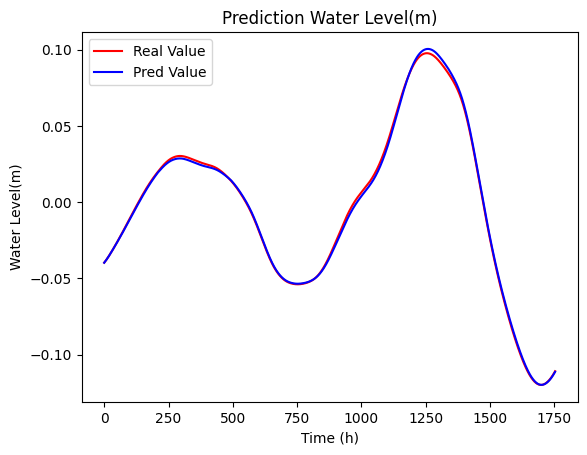

MSE: 2.3396991076907266e-06
MAE: 0.0012412150843365006
R²: 0.9992420634905607
RMSE: 0.0015296075011880423
pred_finally: [-0.03979352 -0.03957908 -0.03936147 ... -0.11195233 -0.11165132
 -0.11134513]
prediction_result: [-0.03979352 -0.03957908 -0.03936147 ... -0.11195233 -0.11165132
 -0.11134513]
lstm_y_turs: [-0.03977298 -0.0395576  -0.03933897 ... -0.1115579  -0.11125217
 -0.11094142]
-------------------------- 10 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 10 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0511 - val_loss: 0.0283
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 2.5750e-04 - val_loss: 5.3230e-04
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 2.6623e-05 - val_loss: 5.3360e-04
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 2.1023e-05 - val_loss: 5.1519e-04
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 1.9580e-05 - val_loss: 5.0019e-04
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 1.8646e-05 - val_loss: 4.8359e-04
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 1.8200e-05 - val_loss: 4.8093e-04
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 1.7202e-05 - val_loss: 5.0860e-04
Epoch 10/30
110/110 [==============================] - 

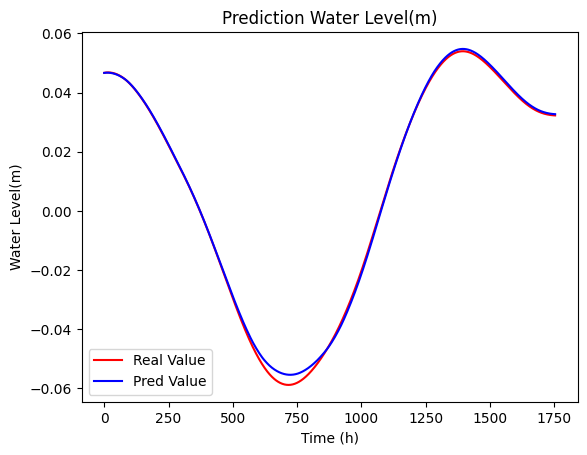

MSE: 1.4123852003656172e-06
MAE: 0.0008161947364021838
R²: 0.9990711463822696
RMSE: 0.0011884381348499454
pred_finally: [0.04663923 0.04665275 0.04666517 ... 0.03269189 0.03268667 0.03268193]
prediction_result: [0.04663923 0.04665275 0.04666517 ... 0.03269189 0.03268667 0.03268193]
lstm_y_turs: [0.04666733 0.04668448 0.04670041 ... 0.03226829 0.032264   0.03226017]
-------------------------- 11 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 11 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0916 - val_loss: 0.0114
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 4.0331e-04 - val_loss: 0.0014
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 1.6517e-04 - val_loss: 5.0585e-04
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 1.0370e-04 - val_loss: 2.3042e-04
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 8.7177e-05 - val_loss: 1.2725e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 7.7936e-05 - val_loss: 6.9406e-05
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 7.1730e-05 - val_loss: 4.5528e-05
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 6.3924e-05 - val_loss: 3.4381e-05
Epoch 10/30
110/110 [==============================] - 0s 3

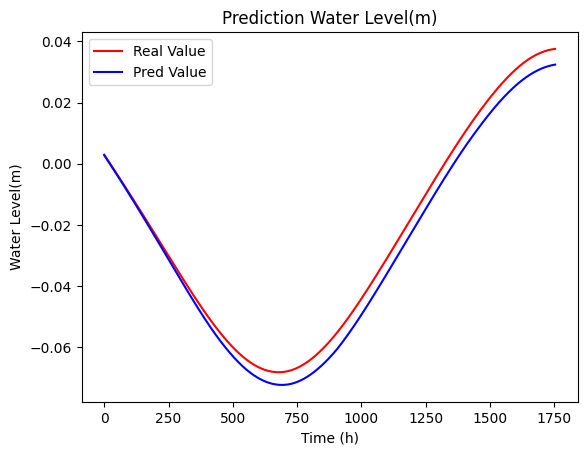

MSE: 1.73230525841397e-05
MAE: 0.0037867917675100922
R²: 0.9847840904637324
RMSE: 0.0041620971377587645
pred_finally: [0.00281639 0.00268883 0.00256118 ... 0.0323767  0.03239085 0.03240458]
prediction_result: [0.00281639 0.00268883 0.00256118 ... 0.0323767  0.03239085 0.03240458]
lstm_y_turs: [0.00290826 0.00278261 0.00265689 ... 0.03752221 0.03753252 0.03754239]
-------------------------- 12 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 12 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 3ms/step - loss: 0.0519 - val_loss: 0.0358
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0162
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 3.9767e-04 - val_loss: 0.0128
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 3.4541e-04 - val_loss: 0.0113
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 3.1171e-04 - val_loss: 0.0107
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 2.8054e-04 - val_loss: 0.0102
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 2.4375e-04 - val_loss: 0.0092
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 2.1103e-04 - val_loss: 0.0088
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 1.7788e-04 - val_loss: 0.0086
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 1.4763e-

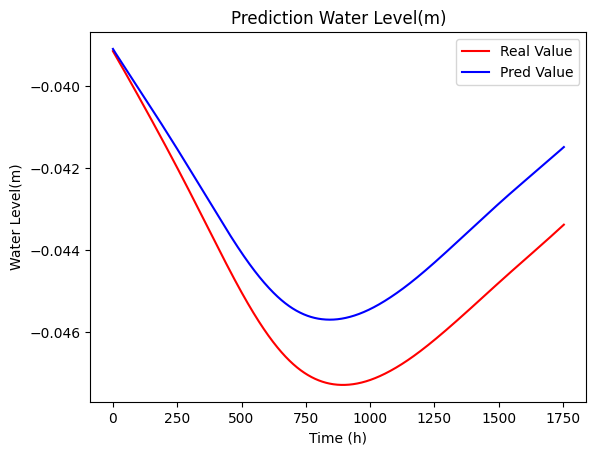

MSE: 2.1869353376836415e-06
MAE: 0.0013451227676247823
R²: 0.5562214796933589
RMSE: 0.0014788290427509333
pred_finally: [-0.03908513 -0.03909575 -0.03910637 ... -0.04149138 -0.0414858
 -0.04148022]
prediction_result: [-0.03908513 -0.03909575 -0.03910637 ... -0.04149138 -0.0414858
 -0.04148022]
lstm_y_turs: [-0.03913943 -0.03915028 -0.03916114 ... -0.04338668 -0.0433809
 -0.04337512]
-------------------------- 13 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 13 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.1415 - val_loss: 0.0050
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0140
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0149
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 9.7636e-04 - val_loss: 0.0125
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 8.5583e-04 - val_loss: 0.0106
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 7.3146e-04 - val_loss: 0.0083
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 6.0607e-04 - val_loss: 0.0066
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 4.8841e-04 - val_loss: 0.0045
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 3.8780e-04 - val_loss: 0.0036
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 2.8905e-04 -

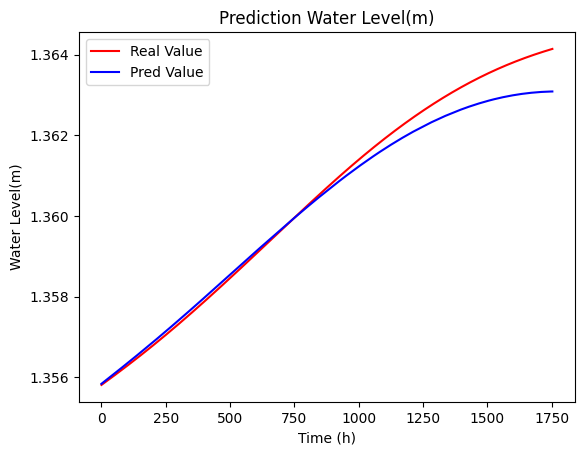

MSE: 1.63244288600759e-07
MAE: 0.0002787672819581288
R²: 0.9758325173370099
RMSE: 0.00040403500912762375
pred_finally: [1.3558385 1.3558435 1.3558486 ... 1.3630868 1.3630868 1.3630869]
prediction_result: [1.3558385 1.3558435 1.3558486 ... 1.3630868 1.3630868 1.3630869]
lstm_y_turs: [1.35581058 1.3558152  1.35581982 ... 1.36413848 1.36414037 1.36414225]
CPU times: total: 1h 27min 34s
Wall time: 24min 25s


In [19]:
%%time
import tensorflow as tf

# Check if GPU is available and set the GPU device
if tf.test.is_gpu_available():
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
imf_choose = 0
finally_rsult = []
finally_y_true = []
#int(len(IMF)/6)
for imf_run in range(int(len(IMF) / 6)):
    ALL_Factor_IMF = IMF[imf_choose:imf_choose+6][:]
    imf_choose = imf_choose + 6
    # imf_choose = imf_choose + 6
    print('--------------------------',imf_run,'--------------------------')
    # IMF[imf_run] = ALL_Factor_IMF
    # print("ALL_Factor_IMF:",ALL_Factor_IMF)
    ALL_Factor_IMF = np.array(ALL_Factor_IMF)
    IMF_Input = np.transpose(ALL_Factor_IMF)
    # print(IMF_Input)

    #[AT,Baro,WD,WG,WL,WS]
    IMF_Input
    df_IMF = pd.DataFrame(IMF_Input)
    # df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF = df_IMF[['WS','WL','WG','AT','Baro','WL']]
    # print(df_IMF)

    # 数据范围过大，对数据进行归一化
    scaler = MinMaxScaler(feature_range=(0, 1))
    df = scaler.fit_transform(df_IMF)

    #数据集划分
    test_split = round(len(df) * 0.20)
    print(test_split)
    def splitData(var, per_test):
        num_test = int(len(var) * per_test)
        train_size = int(len(var) - num_test)
        train_data = var[0:train_size]
        test_data = var[train_size:train_size + num_test]
        return train_data, test_data
    df_training, df_testing = splitData(df, 0.2)
    print(df_training.shape)
    print(df_testing.shape)

    def createXY(dataset, n_past):
        data_X = []
        data_Y = []
        for i in range(n_past, len(dataset)):
            data_X.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            data_Y.append(dataset[i, 5])

        return np.array(data_X), np.array(data_Y)


    trainX, trainY = createXY(df_training, 1)
    testX, testY = createXY(df_testing, 1)

    print('trainX.Shape:----', trainX.shape)
    print('trainY.shape:----', trainY.shape)
    print('testX.shape:----', testX.shape)
    print('testY.shape:----', testY.shape)
    print('----------------------------',imf_run,'------------------------------')

    def N_LSTM(optimizer='adam', batch_size=32, epochs=40):
        model = Sequential()
        model.add(LSTM(200, activation='relu', input_shape=(1, 6)))
        # optimizer = Adam()  # 设置为您希望的学习率
        model.add(Dense(1))
        model.compile(optimizer=optimizer, loss='mse')
        return model


    N_LSTM_Model = KerasRegressor(N_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))

    from sklearn.model_selection import GridSearchCV

    # 定义超参数搜索范围
    param_grid = {
        'optimizer': ['adam'],
        'batch_size': [32, 64],
        'epochs': [30, 50]
    }

    # 执行网格搜索
    grid = GridSearchCV(estimator=N_LSTM_Model, param_grid=param_grid, cv=2)
    grid_result = grid.fit(trainX, trainY)

    best_model = grid_result.best_estimator_

    y_trues,prediction_result = Result_Ana(best_model, 6)

    print('prediction_result:',prediction_result)
    finally_rsult.append(prediction_result)
    print('lstm_y_turs:',y_trues)
    finally_y_true.append(y_trues)

### StackLSTM

CPU times: total: 0 ns
Wall time: 0 ns
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
-------------------------- 0 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 0 ------------------------------


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_21864\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


Epoch 1/30
110/110 [==============================] - 4s 7ms/step - loss: 0.0849 - val_loss: 0.0103
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0110 - val_loss: 0.0065
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0065
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0065
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0065
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0064
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0064
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0063
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0064
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0063

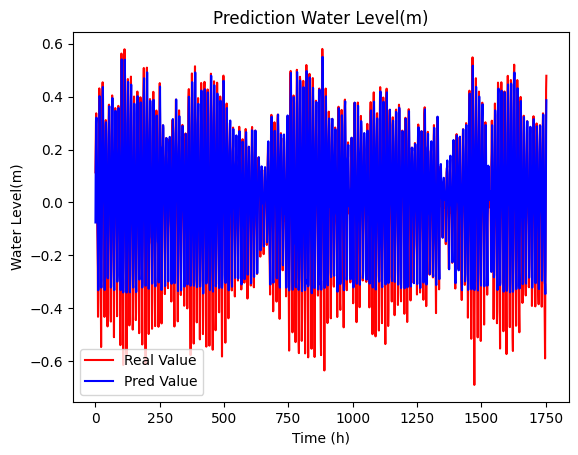

MSE: 0.019023401210575552
MAE: 0.12236854372101993
R²: 0.6828459113787284
RMSE: 0.13792534651243604
pred_finally: [-0.0759242   0.13125937  0.22045976 ...  0.00377539  0.26305512
  0.38628003]
prediction_result: [-0.0759242   0.13125937  0.22045976 ...  0.00377539  0.26305512
  0.38628003]
lstm_y_turs: [0.11360713 0.21314858 0.3050885  ... 0.25443378 0.42630158 0.47881946]
-------------------------- 1 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 1 ------------------------------


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_21864\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


Epoch 1/30
110/110 [==============================] - 3s 6ms/step - loss: 0.0719 - val_loss: 0.0107
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0055
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0055
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0055
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0055
Epoch 7/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0042 - val_loss: 0.0055
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0055
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0055
Epoch 10/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0055

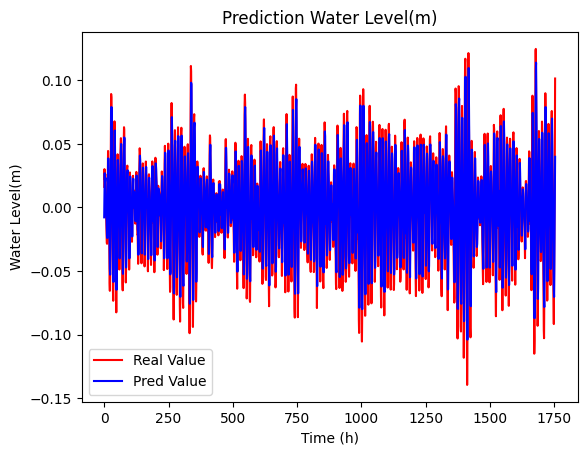

MSE: 0.00045024125998269953
MAE: 0.017637754261139296
R²: 0.7149146961817242
RMSE: 0.021218889225939692
pred_finally: [-0.00777403  0.01392142  0.02691253 ... -0.01429098  0.00943565
  0.03983548]
prediction_result: [-0.00777403  0.01392142  0.02691253 ... -0.01429098  0.00943565
  0.03983548]
lstm_y_turs: [0.01618017 0.03013167 0.02211249 ... 0.01143001 0.04727639 0.1013928 ]
-------------------------- 2 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 2 ------------------------------


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_21864\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


Epoch 1/30
110/110 [==============================] - 3s 8ms/step - loss: 0.1035 - val_loss: 0.0278
Epoch 2/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0194 - val_loss: 0.0196
Epoch 3/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0178 - val_loss: 0.0195
Epoch 4/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0178 - val_loss: 0.0190
Epoch 5/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0176 - val_loss: 0.0189
Epoch 6/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0176 - val_loss: 0.0188
Epoch 7/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0176 - val_loss: 0.0191
Epoch 8/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0175 - val_loss: 0.0190
Epoch 9/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0177 - val_loss: 0.0188
Epoch 10/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0173 - val_loss: 0.0191

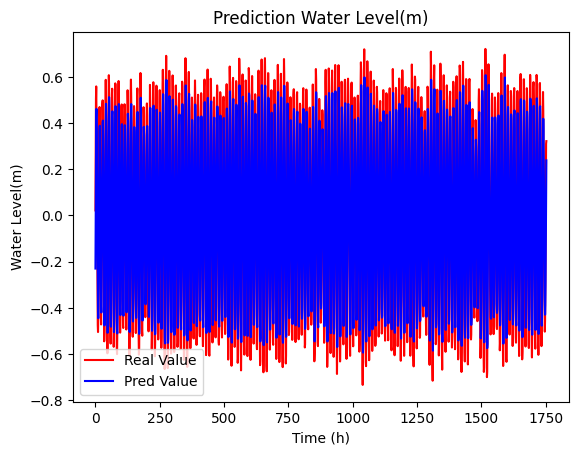

MSE: 0.04099529570987811
MAE: 0.17953506142437445
R²: 0.7582596174471032
RMSE: 0.20247295056347184
pred_finally: [-0.22992948 -0.00146218  0.24127485 ... -0.10194155  0.14629677
  0.23876853]
prediction_result: [-0.22992948 -0.00146218  0.24127485 ... -0.10194155  0.14629677
  0.23876853]
lstm_y_turs: [0.02204645 0.30776679 0.50702586 ... 0.18070221 0.31081457 0.32220905]
-------------------------- 3 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 3 ------------------------------


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_21864\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


Epoch 1/30
110/110 [==============================] - 4s 13ms/step - loss: 0.0634 - val_loss: 0.0110
Epoch 2/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0087 - val_loss: 0.0062
Epoch 3/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0071 - val_loss: 0.0063
Epoch 4/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0070 - val_loss: 0.0061
Epoch 5/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0070 - val_loss: 0.0062
Epoch 6/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 7/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 8/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0071 - val_loss: 0.0062
Epoch 9/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0070 - val_loss: 0.0063
Epoch 10/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0070 - val_loss: 0.006

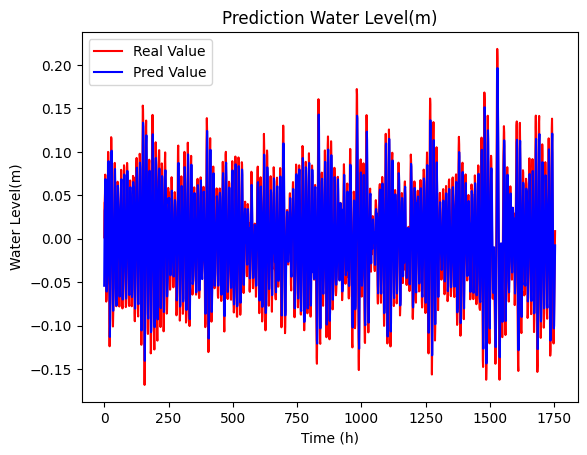

MSE: 0.0010714188908170581
MAE: 0.027819002261377956
R²: 0.7575391616681937
RMSE: 0.03273253566128139
pred_finally: [-0.05405394 -0.00209297  0.03216505 ... -0.04876191 -0.03015555
 -0.00759615]
prediction_result: [-0.05405394 -0.00209297  0.03216505 ... -0.04876191 -0.03015555
 -0.00759615]
lstm_y_turs: [ 0.00162487  0.0415722   0.0426443  ... -0.03505092 -0.00922992
  0.00881298]
-------------------------- 4 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 4 ------------------------------


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_21864\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


Epoch 1/30
110/110 [==============================] - 3s 9ms/step - loss: 0.0687 - val_loss: 0.0076
Epoch 2/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0051 - val_loss: 0.0028
Epoch 3/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 4/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 5/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 6/30
110/110 [==============================] - 1s 6ms/step - loss: 9.8700e-04 - val_loss: 0.0019
Epoch 7/30
110/110 [==============================] - 1s 7ms/step - loss: 9.7110e-04 - val_loss: 0.0020
Epoch 8/30
110/110 [==============================] - 1s 6ms/step - loss: 9.4617e-04 - val_loss: 0.0019
Epoch 9/30
110/110 [==============================] - 1s 6ms/step - loss: 9.4714e-04 - val_loss: 0.0019
Epoch 10/30
110/110 [==============================] - 1s 6ms/step - loss: 9.2091e-0

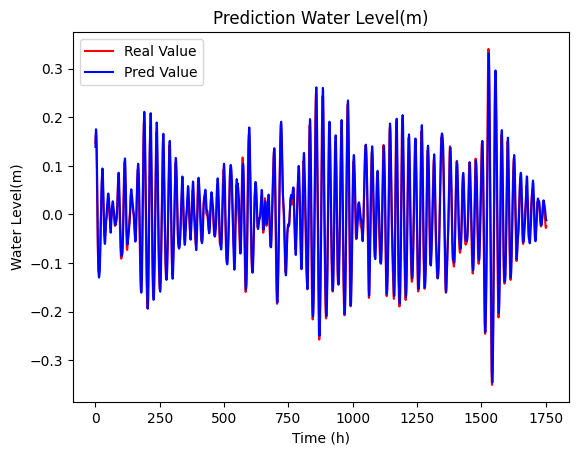

MSE: 0.0007852095363932317
MAE: 0.022795159229744153
R²: 0.9157203112826757
RMSE: 0.028021590540032372
pred_finally: [ 0.13871826  0.16270289  0.17514144 ... -0.0090475  -0.01229227
 -0.01208507]
prediction_result: [ 0.13871826  0.16270289  0.17514144 ... -0.0090475  -0.01229227
 -0.01208507]
lstm_y_turs: [ 0.14654971  0.16163307  0.16559117 ... -0.02793743 -0.02695628
 -0.02455443]
-------------------------- 5 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 5 ------------------------------


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_21864\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


Epoch 1/30
110/110 [==============================] - 3s 10ms/step - loss: 0.0519 - val_loss: 0.0100
Epoch 2/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0015 - val_loss: 0.0090
Epoch 3/30
110/110 [==============================] - 1s 8ms/step - loss: 0.0013 - val_loss: 0.0064
Epoch 4/30
110/110 [==============================] - 1s 7ms/step - loss: 6.3504e-04 - val_loss: 0.0021
Epoch 5/30
110/110 [==============================] - 1s 8ms/step - loss: 1.5408e-04 - val_loss: 7.0849e-04
Epoch 6/30
110/110 [==============================] - 1s 7ms/step - loss: 7.6312e-05 - val_loss: 6.2120e-04
Epoch 7/30
110/110 [==============================] - 1s 7ms/step - loss: 6.9037e-05 - val_loss: 6.3015e-04
Epoch 8/30
110/110 [==============================] - 1s 7ms/step - loss: 6.6903e-05 - val_loss: 6.3014e-04
Epoch 9/30
110/110 [==============================] - 1s 7ms/step - loss: 6.2541e-05 - val_loss: 6.3571e-04
Epoch 10/30
110/110 [==============================] - 

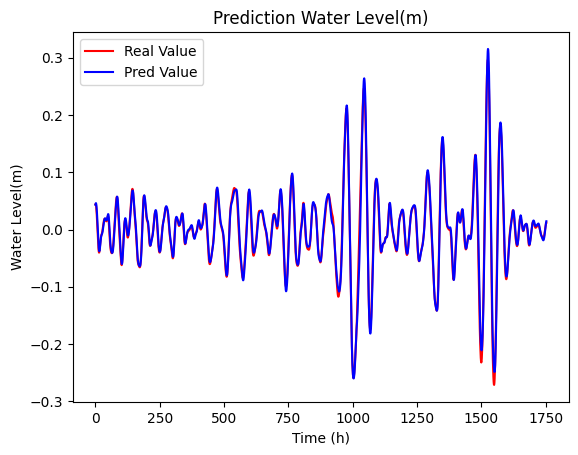

MSE: 8.343705574471139e-05
MAE: 0.006142599947748182
R²: 0.984076584838737
RMSE: 0.009134388635519696
pred_finally: [0.04312219 0.04554706 0.04607756 ... 0.00982074 0.01279128 0.0144435 ]
prediction_result: [0.04312219 0.04554706 0.04607756 ... 0.00982074 0.01279128 0.0144435 ]
lstm_y_turs: [0.04406377 0.04447471 0.04276618 ... 0.01055452 0.01201398 0.01202596]
-------------------------- 6 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 6 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_21864\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.0468 - val_loss: 0.0081
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0052
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 8.8801e-04 - val_loss: 0.0011
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 1.5641e-04 - val_loss: 2.3168e-04
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 5.2231e-05 - val_loss: 1.3424e-04
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 3.3114e-05 - val_loss: 1.0760e-04
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 2.8991e-05 - val_loss: 1.0168e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 2.4784e-05 - val_loss: 9.7032e-05
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 2.5799e-05 - val_loss: 9.5729e-05
Epoch 10/30
110/110 [==============================] - 0s 4

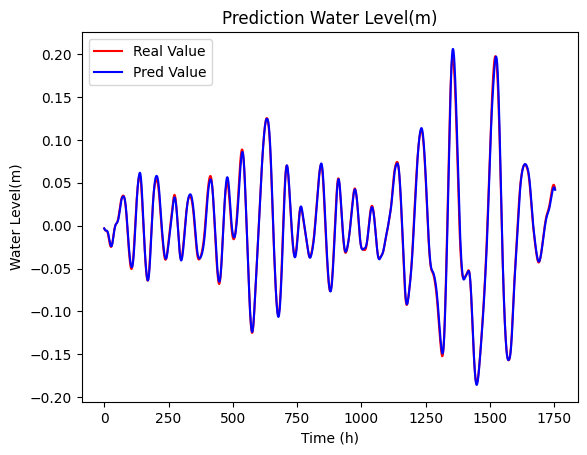

MSE: 1.7976583110052382e-05
MAE: 0.003145580027361032
R²: 0.9958832776492114
RMSE: 0.0042398800820368
pred_finally: [-0.00321469 -0.00385117 -0.0044343  ...  0.04377023  0.04289101
  0.04170877]
prediction_result: [-0.00321469 -0.00385117 -0.0044343  ...  0.04377023  0.04289101
  0.04170877]
lstm_y_turs: [-0.0032455  -0.00394057 -0.00454056 ...  0.04566027  0.04440912
  0.04284824]
-------------------------- 7 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 7 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_21864\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.0635 - val_loss: 0.0071
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0048
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 3.7526e-04 - val_loss: 5.1094e-04
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 7.6545e-05 - val_loss: 2.3521e-04
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 3.1640e-05 - val_loss: 1.9525e-04
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 2.5090e-05 - val_loss: 1.8582e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 2.2285e-05 - val_loss: 1.3806e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 2.3164e-05 - val_loss: 1.6529e-04
Epoch 10/30
110/110 [==============================] - 0s 4ms/s

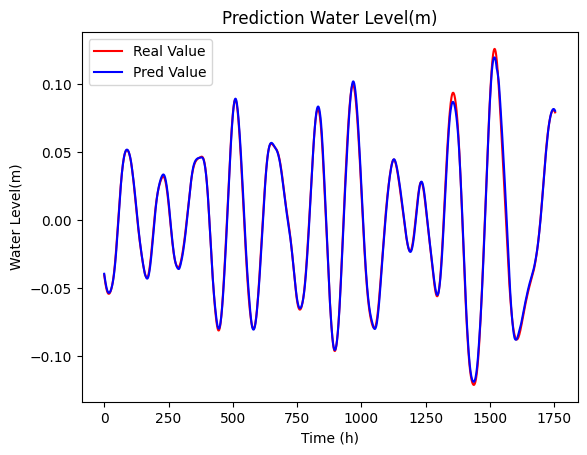

MSE: 6.727231762707019e-06
MAE: 0.001881376463453093
R²: 0.9977133764277549
RMSE: 0.002593690760809202
pred_finally: [-0.03947812 -0.04080867 -0.04211036 ...  0.08121461  0.08085049
  0.08039667]
prediction_result: [-0.03947812 -0.04080867 -0.04211036 ...  0.08121461  0.08085049
  0.08039667]
lstm_y_turs: [-0.04046229 -0.04184348 -0.04318783 ...  0.08021263  0.07979667
  0.07929176]
-------------------------- 8 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 8 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_21864\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.0774 - val_loss: 0.0114
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0014
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 2.5205e-04 - val_loss: 2.9751e-04
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 8.6836e-05 - val_loss: 1.8914e-04
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 6.6558e-05 - val_loss: 1.7453e-04
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 6.0589e-05 - val_loss: 1.4411e-04
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 4.7682e-05 - val_loss: 1.3892e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 4.2786e-05 - val_loss: 1.2151e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 3.6922e-05 - val_loss: 1.2238e-04
Epoch 10/30
110/110 [==============================] - 

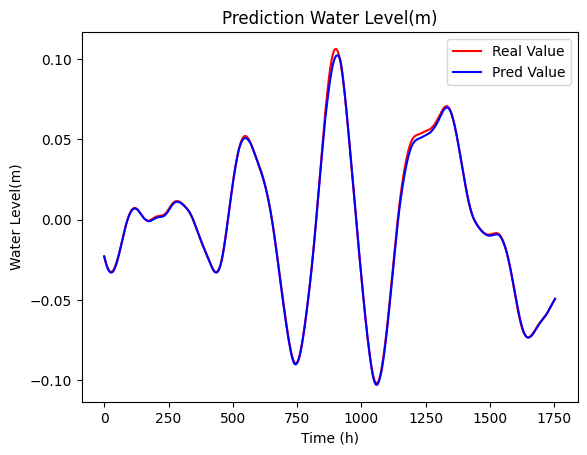

MSE: 2.222027948119146e-06
MAE: 0.000909378333069839
R²: 0.9990231999999466
RMSE: 0.0014906468220605262
pred_finally: [-0.0229911  -0.02367464 -0.02433916 ... -0.04978966 -0.04953277
 -0.04928084]
prediction_result: [-0.0229911  -0.02367464 -0.02433916 ... -0.04978966 -0.04953277
 -0.04928084]
lstm_y_turs: [-0.02283807 -0.02351739 -0.02417714 ... -0.04998947 -0.04972992
 -0.0494741 ]
-------------------------- 9 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 9 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_21864\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 5ms/step - loss: 0.0818 - val_loss: 0.0087
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0042
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 8.4084e-04 - val_loss: 0.0011
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 3.0642e-04 - val_loss: 5.1905e-04
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 1.8874e-04 - val_loss: 4.2662e-04
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 1.2971e-04 - val_loss: 2.4658e-04
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 9.6962e-05 - val_loss: 1.8496e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 7.8140e-05 - val_loss: 1.6961e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 6.5778e-05 - val_loss: 1.4244e-04
Epoch 10/30
110/110 [==============================] - 0s 4

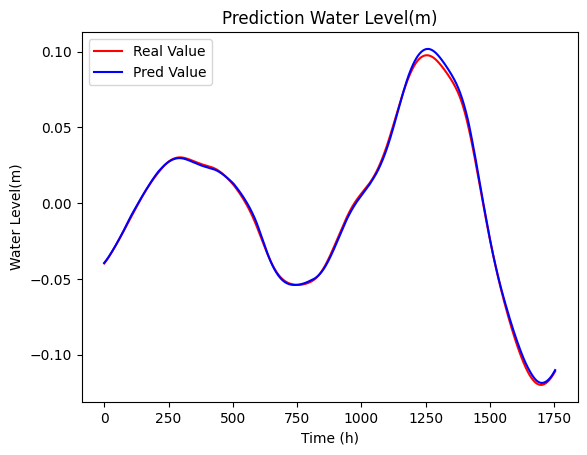

MSE: 3.0083784997959826e-06
MAE: 0.0013157046692206843
R²: 0.9990254473783776
RMSE: 0.0017344677857475423
pred_finally: [-0.03941702 -0.03921527 -0.03900997 ... -0.11078756 -0.11047179
 -0.11015027]
prediction_result: [-0.03941702 -0.03921527 -0.03900997 ... -0.11078756 -0.11047179
 -0.11015027]
lstm_y_turs: [-0.03977298 -0.0395576  -0.03933897 ... -0.1115579  -0.11125217
 -0.11094142]
-------------------------- 10 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 10 ------------------------------


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_21864\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


Epoch 1/30
110/110 [==============================] - 2s 6ms/step - loss: 0.0771 - val_loss: 0.0272
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0038
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 1.7580e-04 - val_loss: 0.0027
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 7.1678e-05 - val_loss: 0.0018
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 4.4571e-05 - val_loss: 0.0015
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 3.3302e-05 - val_loss: 0.0013
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 2.5084e-05 - val_loss: 0.0013
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 2.1408e-05 - val_loss: 0.0012
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 1.5672e-05 - val_loss: 0.0011
Epoch 10/30
110/110 [==============================] - 0s 4ms/step - los

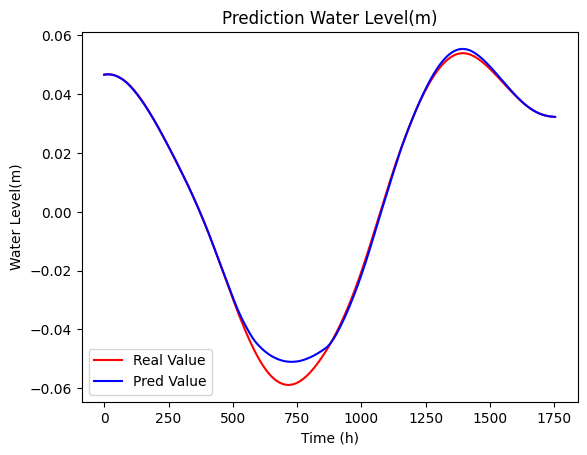

MSE: 6.512685172747508e-06
MAE: 0.0013776187392374108
R²: 0.9957169395556679
RMSE: 0.002551996311272316
pred_finally: [0.04663604 0.04665316 0.04666904 ... 0.03231612 0.03231183 0.03230803]
prediction_result: [0.04663604 0.04665316 0.04666904 ... 0.03231612 0.03231183 0.03230803]
lstm_y_turs: [0.04666733 0.04668448 0.04670041 ... 0.03226829 0.032264   0.03226017]
-------------------------- 11 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 11 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_21864\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 5ms/step - loss: 0.0921 - val_loss: 0.0075
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 9.7352e-04 - val_loss: 0.0033
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 3.7338e-04 - val_loss: 0.0023
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 3.0761e-04 - val_loss: 0.0020
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 2.5629e-04 - val_loss: 0.0014
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 2.0415e-04 - val_loss: 0.0011
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 1.3767e-04 - val_loss: 6.4945e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 8.8500e-05 - val_loss: 2.8763e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 6.0840e-05 - val_loss: 1.8601e-04
Epoch 10/30
110/110 [==============================] - 0s 4ms/step 

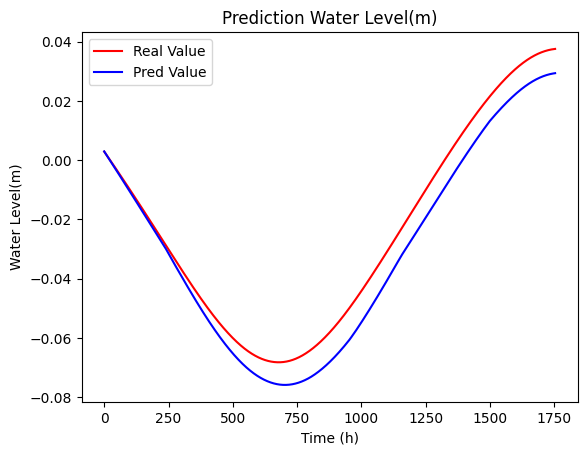

MSE: 5.7561772290576074e-05
MAE: 0.006827127557291188
R²: 0.9494399318095622
RMSE: 0.0075869474949136215
pred_finally: [0.00295299 0.00281919 0.00268535 ... 0.02932958 0.02934196 0.02935391]
prediction_result: [0.00295299 0.00281919 0.00268535 ... 0.02932958 0.02934196 0.02935391]
lstm_y_turs: [0.00290826 0.00278261 0.00265689 ... 0.03752221 0.03753252 0.03754239]
-------------------------- 12 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 12 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_21864\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.0851 - val_loss: 0.0517
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0128
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 4.2753e-04 - val_loss: 0.0058
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 2.7553e-04 - val_loss: 0.0042
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 1.7364e-04 - val_loss: 0.0041
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 9.4636e-05 - val_loss: 0.0044
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 4.8962e-05 - val_loss: 0.0052
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 2.5602e-05 - val_loss: 0.0060
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 1.7402e-05 - val_loss: 0.0065
Epoch 10/30
110/110 [==============================] - 0s 4ms/step - loss: 1.4754e-

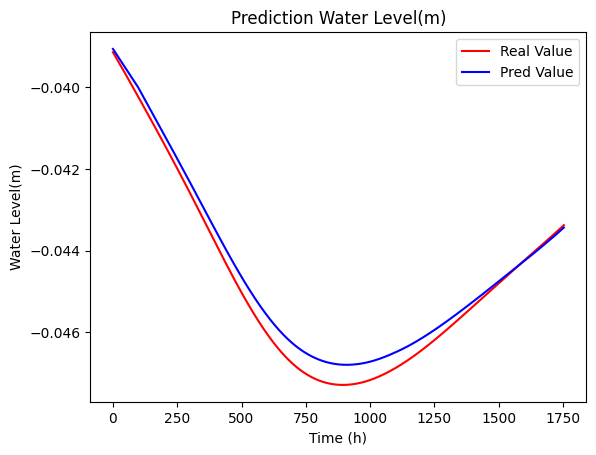

MSE: 1.0624900415597838e-07
MAE: 0.00028233790107221626
R²: 0.9784396799320387
RMSE: 0.00032595859270155526
pred_finally: [-0.03905847 -0.03906804 -0.03907762 ... -0.04344523 -0.04343959
 -0.04343394]
prediction_result: [-0.03905847 -0.03906804 -0.03907762 ... -0.04344523 -0.04343959
 -0.04343394]
lstm_y_turs: [-0.03913943 -0.03915028 -0.03916114 ... -0.04338668 -0.0433809
 -0.04337512]
-------------------------- 13 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 13 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_21864\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 5ms/step - loss: 0.1737 - val_loss: 0.0119
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0200
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0149
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 8.3544e-04 - val_loss: 0.0107
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 3.3426e-04 - val_loss: 7.0877e-04
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 3.2374e-05 - val_loss: 2.1179e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 1.2911e-05 - val_loss: 1.5136e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 7.1370e-06 - val_loss: 9.8893e-05
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 5.1640e-06 - val_loss: 7.2390e-05
Epoch 10/30
110/110 [==============================] - 0s 4ms/step 

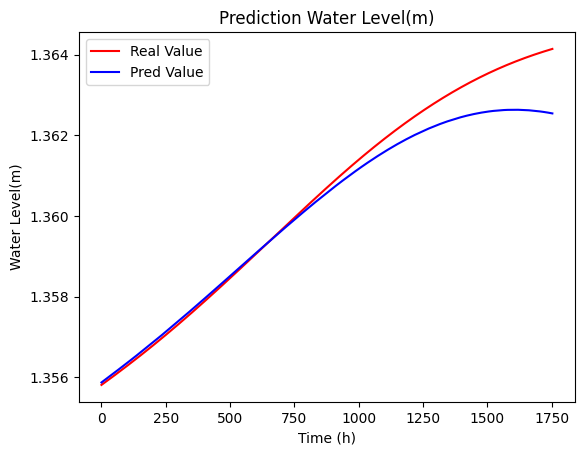

MSE: 3.2786358967695987e-07
MAE: 0.00037452467080852623
R²: 0.9514614711040691
RMSE: 0.0005725937387685617
pred_finally: [1.3558716 1.3558763 1.3558812 ... 1.3625455 1.3625443 1.3625431]
prediction_result: [1.3558716 1.3558763 1.3558812 ... 1.3625455 1.3625443 1.3625431]
lstm_y_turs: [1.35581058 1.3558152  1.35581982 ... 1.36413848 1.36414037 1.36414225]


In [5]:
%time
# def Stack_LSTM():
#         model = Sequential()
#         model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 6)))
#         model.add(LSTM(100, activation='relu'))
#         model.add(Dense(1))
#         model.compile(optimizer='adam', loss='mse')
#         return model
#     Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))
#     Model_Name_Two = 'Stack_LSTM_Model'
#     Stack_LSTM_Model.fit(trainX,trainY)
#     Result_Ana(Stack_LSTM_Model,6,Model_Name_Two)
#
#     #BiLSTM
#     def BiLSTM():
#         model = Sequential()
#         model.add(Bidirectional(LSTM(200, activation='relu'), input_shape=(1, 6)))
#         model.add(Dense(1))
#         model.compile(optimizer='adam', loss='mse')
#         return model
#     # history = BiLSTM_Model.fit(trainX,trainY,epochs=30,verbose=1,validation_data=(testX, testY))
#     BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))
#     Model_Name_Three = 'BiLSTM_Model'
#     BiLSTM_Model.fit(trainX,trainY)
#     Result_Ana(BiLSTM_Model,6,Model_Name_Three)

import tensorflow as tf

# Check if GPU is available and set the GPU device
if tf.test.is_gpu_available():
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
imf_choose = 0
finally_rsult = []
finally_y_true = []
#int(len(IMF)/6)
for imf_run in range(int(len(IMF) / 6)):
    ALL_Factor_IMF = IMF[imf_choose:imf_choose+6][:]
    imf_choose = imf_choose + 6
    # imf_choose = imf_choose + 6
    print('--------------------------',imf_run,'--------------------------')
    # IMF[imf_run] = ALL_Factor_IMF
    # print("ALL_Factor_IMF:",ALL_Factor_IMF)
    ALL_Factor_IMF = np.array(ALL_Factor_IMF)
    IMF_Input = np.transpose(ALL_Factor_IMF)
    # print(IMF_Input)

    #[AT,Baro,WD,WG,WL,WS]
    IMF_Input
    df_IMF = pd.DataFrame(IMF_Input)
    # df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF = df_IMF[['WS','WL','WG','AT','Baro','WL']]
    # print(df_IMF)

    # 数据范围过大，对数据进行归一化
    scaler = MinMaxScaler(feature_range=(0, 1))
    df = scaler.fit_transform(df_IMF)

    #数据集划分
    test_split = round(len(df) * 0.20)
    print(test_split)
    def splitData(var, per_test):
        num_test = int(len(var) * per_test)
        train_size = int(len(var) - num_test)
        train_data = var[0:train_size]
        test_data = var[train_size:train_size + num_test]
        return train_data, test_data
    df_training, df_testing = splitData(df, 0.2)
    print(df_training.shape)
    print(df_testing.shape)

    def createXY(dataset, n_past):
        data_X = []
        data_Y = []
        for i in range(n_past, len(dataset)):
            data_X.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            data_Y.append(dataset[i, 5])

        return np.array(data_X), np.array(data_Y)


    trainX, trainY = createXY(df_training, 1)
    testX, testY = createXY(df_testing, 1)

    print('trainX.Shape:----', trainX.shape)
    print('trainY.shape:----', trainY.shape)
    print('testX.shape:----', testX.shape)
    print('testY.shape:----', testY.shape)
    print('----------------------------',imf_run,'------------------------------')

    # def N_LSTM(optimizer='adam', batch_size=32, epochs=40):
    #     model = Sequential()
    #     model.add(LSTM(200, activation='relu', input_shape=(1, 6)))
    #     # optimizer = Adam()  # 设置为您希望的学习率
    #     model.add(Dense(1))
    #     model.compile(optimizer=optimizer, loss='mse')
    #     return model
    def Stack_LSTM(optimizer='adam', batch_size=32, epochs=40):
        model = Sequential()
        model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 6)))
        model.add(LSTM(100, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer=optimizer, loss='mse')
        return model
    Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))

    # N_LSTM_Model = KerasRegressor(N_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))

    from sklearn.model_selection import GridSearchCV

    # 定义超参数搜索范围
    param_grid = {
        'optimizer': ['adam'],
        'batch_size': [32, 64],
        'epochs': [30, 50]
    }

    # 执行网格搜索
    grid = GridSearchCV(estimator=Stack_LSTM_Model, param_grid=param_grid, cv=2)
    grid_result = grid.fit(trainX, trainY)

    best_model = grid_result.best_estimator_

    y_trues,prediction_result = Result_Ana(best_model, 6)

    print('prediction_result:',prediction_result)
    finally_rsult.append(prediction_result)
    print('lstm_y_turs:',y_trues)
    finally_y_true.append(y_trues)

## BiLSTM

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
-------------------------- 0 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 0 ------------------------------


<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/30
110/110 [==============================] - 2s 5ms/step - loss: 0.0515 - val_loss: 0.0094
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0103 - val_loss: 0.0065
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0064
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0067
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.0065
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0064
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0064
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0063
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.0066
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0062

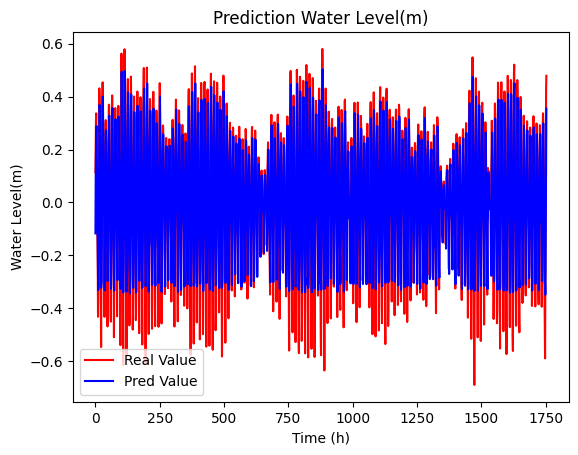

MSE: 0.01828489271077479
MAE: 0.11623463413037614
R²: 0.6951581676151771
RMSE: 0.13522164290813357
pred_finally: [-0.11718611  0.09876042  0.18728761 ... -0.0385297   0.22785549
  0.35467952]
prediction_result: [-0.11718611  0.09876042  0.18728761 ... -0.0385297   0.22785549
  0.35467952]
lstm_y_turs: [0.11360713 0.21314858 0.3050885  ... 0.25443378 0.42630158 0.47881946]
-------------------------- 1 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 1 ------------------------------
Epoch 1/30


<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 2s 5ms/step - loss: 0.0348 - val_loss: 0.0103
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0055
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0054
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0054
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0055
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0054
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0055
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0055
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0056
Epoch 11/3

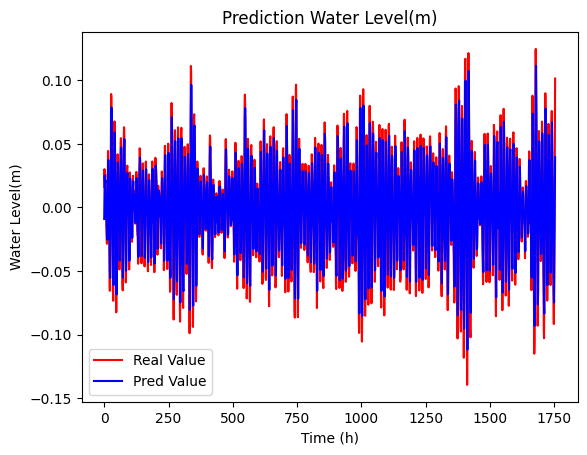

MSE: 0.00044999189844360246
MAE: 0.01744674572341945
R²: 0.7150725877755262
RMSE: 0.02121301247922139
pred_finally: [-0.0091138   0.01249125  0.02519897 ... -0.01492591  0.00877683
  0.03955961]
prediction_result: [-0.0091138   0.01249125  0.02519897 ... -0.01492591  0.00877683
  0.03955961]
lstm_y_turs: [0.01618017 0.03013167 0.02211249 ... 0.01143001 0.04727639 0.1013928 ]
-------------------------- 2 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 2 ------------------------------


<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/30
110/110 [==============================] - 2s 6ms/step - loss: 0.0589 - val_loss: 0.0197
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0175 - val_loss: 0.0188
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0174 - val_loss: 0.0188
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0175 - val_loss: 0.0189
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0174 - val_loss: 0.0188
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0174 - val_loss: 0.0188
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0174 - val_loss: 0.0191
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0175 - val_loss: 0.0190
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.0201
Epoch 10/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.0188

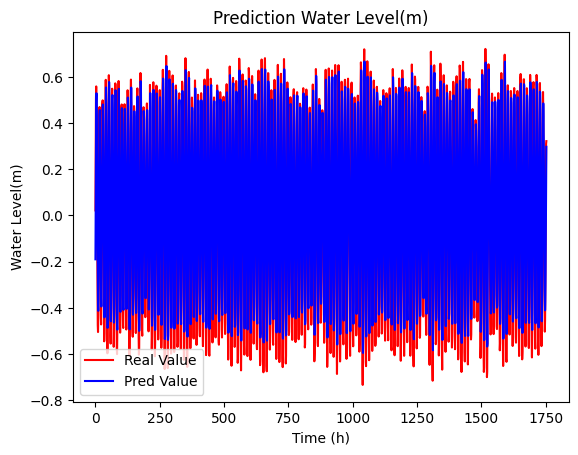

MSE: 0.04148314617039845
MAE: 0.18321108340913725
R²: 0.7553828689101637
RMSE: 0.2036741175760888
pred_finally: [-0.18978406  0.02909498  0.30293965 ... -0.05905765  0.19624054
  0.29769203]
prediction_result: [-0.18978406  0.02909498  0.30293965 ... -0.05905765  0.19624054
  0.29769203]
lstm_y_turs: [0.02204645 0.30776679 0.50702586 ... 0.18070221 0.31081457 0.32220905]
-------------------------- 3 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 3 ------------------------------


<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/30
110/110 [==============================] - 4s 8ms/step - loss: 0.0405 - val_loss: 0.0096
Epoch 2/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0078 - val_loss: 0.0062
Epoch 3/30
110/110 [==============================] - 1s 8ms/step - loss: 0.0069 - val_loss: 0.0061
Epoch 4/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0070 - val_loss: 0.0061
Epoch 5/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0070 - val_loss: 0.0063
Epoch 6/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0069 - val_loss: 0.0061
Epoch 7/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0069 - val_loss: 0.0061
Epoch 8/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 9/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 10/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0069 - val_loss: 0.0068

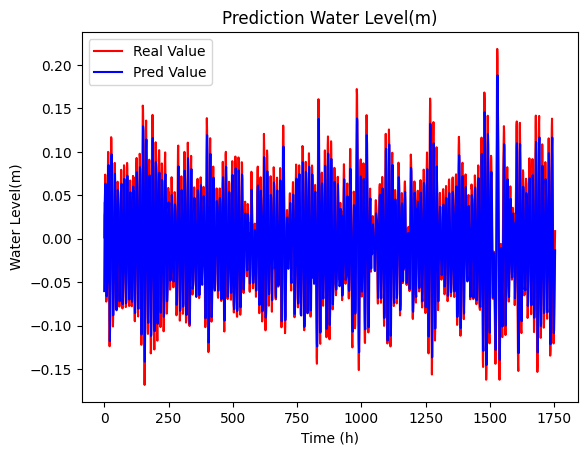

MSE: 0.001091601620697138
MAE: 0.02795228879009199
R²: 0.7529718335685214
RMSE: 0.03303939498079736
pred_finally: [-0.06018895 -0.00749746  0.02718377 ... -0.05421852 -0.03587951
 -0.01331313]
prediction_result: [-0.06018895 -0.00749746  0.02718377 ... -0.05421852 -0.03587951
 -0.01331313]
lstm_y_turs: [ 0.00162487  0.0415722   0.0426443  ... -0.03505092 -0.00922992
  0.00881298]
-------------------------- 4 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 4 ------------------------------


<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/30
110/110 [==============================] - 3s 9ms/step - loss: 0.0405 - val_loss: 0.0065
Epoch 2/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 3/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 4/30
110/110 [==============================] - 1s 6ms/step - loss: 9.6944e-04 - val_loss: 0.0020
Epoch 5/30
110/110 [==============================] - 1s 6ms/step - loss: 9.3833e-04 - val_loss: 0.0021
Epoch 6/30
110/110 [==============================] - 1s 6ms/step - loss: 9.5246e-04 - val_loss: 0.0022
Epoch 7/30
110/110 [==============================] - 1s 7ms/step - loss: 9.3638e-04 - val_loss: 0.0020
Epoch 8/30
110/110 [==============================] - 1s 6ms/step - loss: 9.3826e-04 - val_loss: 0.0019
Epoch 9/30
110/110 [==============================] - 1s 6ms/step - loss: 9.4205e-04 - val_loss: 0.0020
Epoch 10/30
110/110 [==============================] - 1s 6ms/step - loss: 9

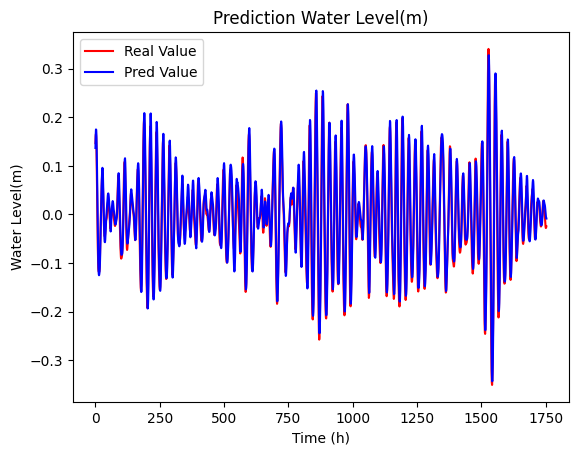

MSE: 0.0007706381072762562
MAE: 0.022563237673121694
R²: 0.9172843212102503
RMSE: 0.027760369364910404
pred_finally: [ 0.1367198   0.16246472  0.17479254 ... -0.00496678 -0.00847003
 -0.00844803]
prediction_result: [ 0.1367198   0.16246472  0.17479254 ... -0.00496678 -0.00847003
 -0.00844803]
lstm_y_turs: [ 0.14654971  0.16163307  0.16559117 ... -0.02793743 -0.02695628
 -0.02455443]
-------------------------- 5 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 5 ------------------------------


<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/30
110/110 [==============================] - 4s 9ms/step - loss: 0.0218 - val_loss: 0.0078
Epoch 2/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 3/30
110/110 [==============================] - 1s 7ms/step - loss: 6.1030e-04 - val_loss: 0.0026
Epoch 4/30
110/110 [==============================] - 1s 7ms/step - loss: 2.0863e-04 - val_loss: 9.6820e-04
Epoch 5/30
110/110 [==============================] - 1s 7ms/step - loss: 8.2603e-05 - val_loss: 5.3848e-04
Epoch 6/30
110/110 [==============================] - 1s 7ms/step - loss: 6.2204e-05 - val_loss: 4.4238e-04
Epoch 7/30
110/110 [==============================] - 1s 7ms/step - loss: 5.8518e-05 - val_loss: 4.1287e-04
Epoch 8/30
110/110 [==============================] - 1s 8ms/step - loss: 5.4553e-05 - val_loss: 3.9747e-04
Epoch 9/30
110/110 [==============================] - 1s 7ms/step - loss: 5.4453e-05 - val_loss: 4.0543e-04
Epoch 10/30
110/110 [===========================

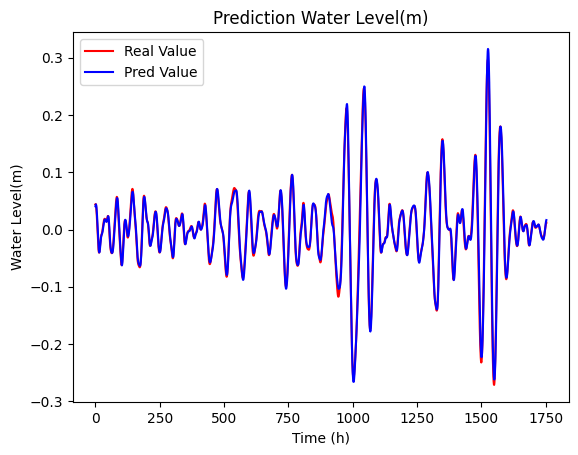

MSE: 6.764985862454596e-05
MAE: 0.005709794234775228
R²: 0.9870894679244758
RMSE: 0.008224953411694559
pred_finally: [0.04065335 0.04327822 0.04388131 ... 0.01222381 0.01502011 0.01648984]
prediction_result: [0.04065335 0.04327822 0.04388131 ... 0.01222381 0.01502011 0.01648984]
lstm_y_turs: [0.04406377 0.04447471 0.04276618 ... 0.01055452 0.01201398 0.01202596]
-------------------------- 6 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 6 ------------------------------


<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/30
110/110 [==============================] - 3s 8ms/step - loss: 0.0277 - val_loss: 0.0088
Epoch 2/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0023 - val_loss: 0.0070
Epoch 3/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 4/30
110/110 [==============================] - 1s 6ms/step - loss: 8.5431e-04 - val_loss: 0.0016
Epoch 5/30
110/110 [==============================] - 1s 6ms/step - loss: 2.1458e-04 - val_loss: 3.8178e-04
Epoch 6/30
110/110 [==============================] - 1s 6ms/step - loss: 5.2715e-05 - val_loss: 1.9142e-04
Epoch 7/30
110/110 [==============================] - 1s 6ms/step - loss: 2.8111e-05 - val_loss: 1.4846e-04
Epoch 8/30
110/110 [==============================] - 1s 6ms/step - loss: 2.1561e-05 - val_loss: 1.3458e-04
Epoch 9/30
110/110 [==============================] - 1s 6ms/step - loss: 2.0207e-05 - val_loss: 1.2225e-04
Epoch 10/30
110/110 [==============================] - 1

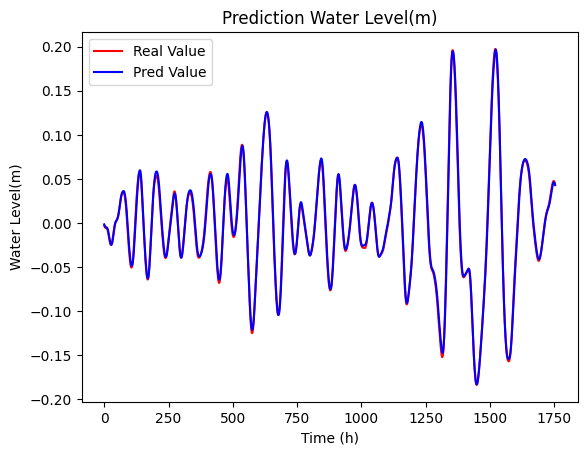

MSE: 1.4741128895358737e-05
MAE: 0.0030491007641677208
R²: 0.9966242119301613
RMSE: 0.0038394177807785828
pred_finally: [-0.00157146 -0.00227929 -0.0029465  ...  0.04546404  0.0445432
  0.04330248]
prediction_result: [-0.00157146 -0.00227929 -0.0029465  ...  0.04546404  0.0445432
  0.04330248]
lstm_y_turs: [-0.0032455  -0.00394057 -0.00454056 ...  0.04566027  0.04440912
  0.04284824]
-------------------------- 7 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 7 ------------------------------


<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/30
110/110 [==============================] - 4s 12ms/step - loss: 0.0286 - val_loss: 0.0078
Epoch 2/30
110/110 [==============================] - 1s 9ms/step - loss: 0.0031 - val_loss: 0.0056
Epoch 3/30
110/110 [==============================] - 1s 10ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 4/30
110/110 [==============================] - 1s 9ms/step - loss: 7.8472e-04 - val_loss: 7.6005e-04
Epoch 5/30
110/110 [==============================] - 1s 10ms/step - loss: 1.2627e-04 - val_loss: 1.3481e-04
Epoch 6/30
110/110 [==============================] - 1s 9ms/step - loss: 3.1651e-05 - val_loss: 6.9406e-05
Epoch 7/30
110/110 [==============================] - 1s 9ms/step - loss: 2.0645e-05 - val_loss: 5.8409e-05
Epoch 8/30
110/110 [==============================] - 1s 9ms/step - loss: 1.6794e-05 - val_loss: 5.1501e-05
Epoch 9/30
110/110 [==============================] - 1s 9ms/step - loss: 1.3779e-05 - val_loss: 4.9045e-05
Epoch 10/30
110/110 [============================

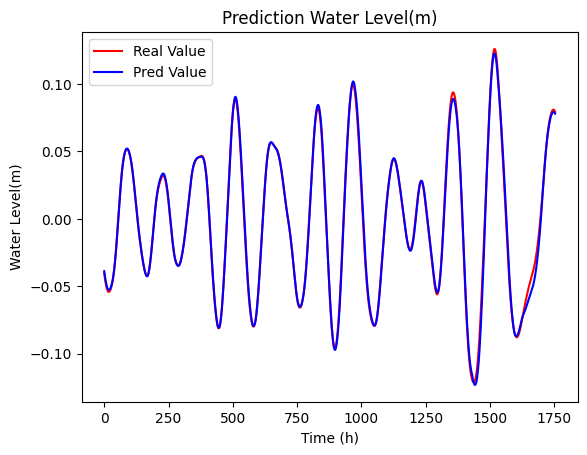

MSE: 9.13050212713112e-06
MAE: 0.002105070581570872
R²: 0.9968964914355901
RMSE: 0.003021672074718089
pred_finally: [-0.03883619 -0.04016062 -0.04145214 ...  0.07868817  0.07837337
  0.07797936]
prediction_result: [-0.03883619 -0.04016062 -0.04145214 ...  0.07868817  0.07837337
  0.07797936]
lstm_y_turs: [-0.04046229 -0.04184348 -0.04318783 ...  0.08021263  0.07979667
  0.07929176]
-------------------------- 8 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 8 ------------------------------


<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/30
110/110 [==============================] - 4s 13ms/step - loss: 0.0334 - val_loss: 0.0085
Epoch 2/30
110/110 [==============================] - 1s 10ms/step - loss: 0.0027 - val_loss: 0.0010
Epoch 3/30
110/110 [==============================] - 1s 11ms/step - loss: 2.2992e-04 - val_loss: 2.0475e-04
Epoch 4/30
110/110 [==============================] - 1s 11ms/step - loss: 6.8282e-05 - val_loss: 9.1999e-05
Epoch 5/30
110/110 [==============================] - 1s 10ms/step - loss: 3.6403e-05 - val_loss: 6.5458e-05
Epoch 6/30
110/110 [==============================] - 1s 13ms/step - loss: 2.4181e-05 - val_loss: 5.5456e-05
Epoch 7/30
110/110 [==============================] - 1s 11ms/step - loss: 1.8353e-05 - val_loss: 4.4412e-05
Epoch 8/30
110/110 [==============================] - 1s 10ms/step - loss: 1.4842e-05 - val_loss: 3.6720e-05
Epoch 9/30
110/110 [==============================] - 1s 10ms/step - loss: 1.3100e-05 - val_loss: 3.3225e-05
Epoch 10/30
110/110 [==============

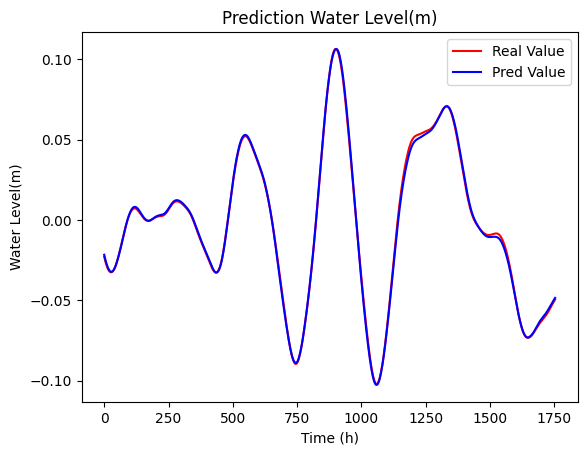

MSE: 1.7175740044890885e-06
MAE: 0.0010101388061679577
R²: 0.999244957162174
RMSE: 0.0013105624763776387
pred_finally: [-0.0216117  -0.02229752 -0.02298182 ... -0.0489223  -0.04867569
 -0.04843389]
prediction_result: [-0.0216117  -0.02229752 -0.02298182 ... -0.0489223  -0.04867569
 -0.04843389]
lstm_y_turs: [-0.02283807 -0.02351739 -0.02417714 ... -0.04998947 -0.04972992
 -0.0494741 ]
-------------------------- 9 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 9 ------------------------------


<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/30
110/110 [==============================] - 4s 11ms/step - loss: 0.0472 - val_loss: 0.0077
Epoch 2/30
110/110 [==============================] - 1s 8ms/step - loss: 0.0026 - val_loss: 0.0030
Epoch 3/30
110/110 [==============================] - 1s 8ms/step - loss: 3.5834e-04 - val_loss: 3.8550e-04
Epoch 4/30
110/110 [==============================] - 1s 8ms/step - loss: 7.7560e-05 - val_loss: 2.5405e-04
Epoch 5/30
110/110 [==============================] - 1s 8ms/step - loss: 5.2838e-05 - val_loss: 1.9510e-04
Epoch 6/30
110/110 [==============================] - 1s 8ms/step - loss: 4.3514e-05 - val_loss: 1.4981e-04
Epoch 7/30
110/110 [==============================] - 1s 8ms/step - loss: 3.8452e-05 - val_loss: 1.1549e-04
Epoch 8/30
110/110 [==============================] - 1s 8ms/step - loss: 3.3578e-05 - val_loss: 9.5201e-05
Epoch 9/30
110/110 [==============================] - 1s 8ms/step - loss: 3.1140e-05 - val_loss: 7.8849e-05
Epoch 10/30
110/110 [======================

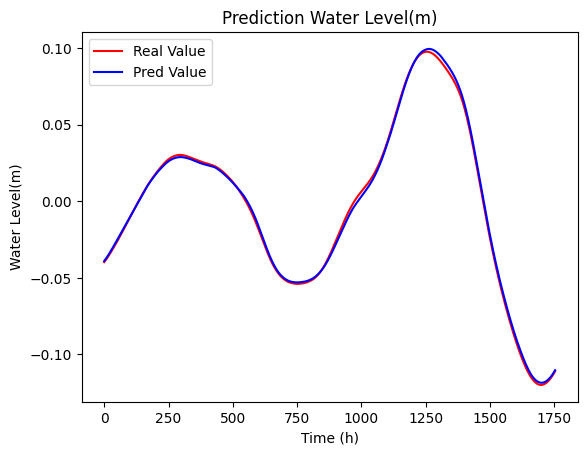

MSE: 3.1407937331049183e-06
MAE: 0.0015113036390556112
R²: 0.9989825519738357
RMSE: 0.0017722284652676467
pred_finally: [-0.03904132 -0.03882084 -0.03859713 ... -0.11092188 -0.11062726
 -0.11032738]
prediction_result: [-0.03904132 -0.03882084 -0.03859713 ... -0.11092188 -0.11062726
 -0.11032738]
lstm_y_turs: [-0.03977298 -0.0395576  -0.03933897 ... -0.1115579  -0.11125217
 -0.11094142]
-------------------------- 10 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 10 ------------------------------


<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/30
110/110 [==============================] - 4s 11ms/step - loss: 0.0422 - val_loss: 0.0198
Epoch 2/30
110/110 [==============================] - 1s 9ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 3/30
110/110 [==============================] - 1s 9ms/step - loss: 6.1872e-05 - val_loss: 0.0011
Epoch 4/30
110/110 [==============================] - 1s 9ms/step - loss: 1.7821e-05 - val_loss: 0.0010
Epoch 5/30
110/110 [==============================] - 1s 8ms/step - loss: 1.6295e-05 - val_loss: 0.0010
Epoch 6/30
110/110 [==============================] - 1s 8ms/step - loss: 1.5524e-05 - val_loss: 9.7655e-04
Epoch 7/30
110/110 [==============================] - 1s 9ms/step - loss: 1.4753e-05 - val_loss: 9.7213e-04
Epoch 8/30
110/110 [==============================] - 1s 9ms/step - loss: 1.4449e-05 - val_loss: 9.2789e-04
Epoch 9/30
110/110 [==============================] - 1s 9ms/step - loss: 1.3207e-05 - val_loss: 9.3634e-04
Epoch 10/30
110/110 [==============================] - 

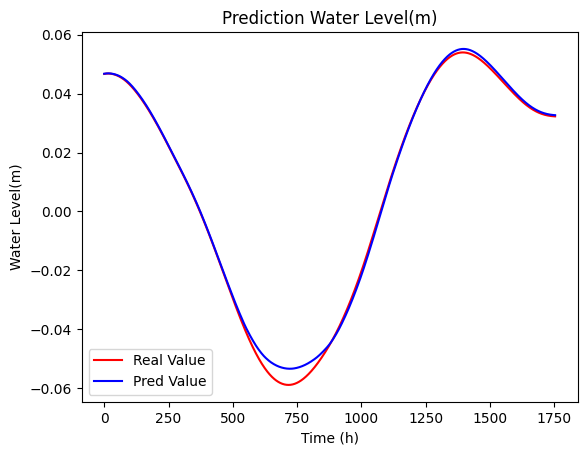

MSE: 3.3341920128117058e-06
MAE: 0.001169610023039495
R²: 0.9978072721857277
RMSE: 0.0018259770022680203
pred_finally: [0.04672641 0.04674224 0.04675706 ... 0.03267895 0.03267325 0.03266804]
prediction_result: [0.04672641 0.04674224 0.04675706 ... 0.03267895 0.03267325 0.03266804]
lstm_y_turs: [0.04666733 0.04668448 0.04670041 ... 0.03226829 0.032264   0.03226017]
-------------------------- 11 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 11 ------------------------------


<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/30
110/110 [==============================] - 4s 10ms/step - loss: 0.0664 - val_loss: 0.0090
Epoch 2/30
110/110 [==============================] - 1s 7ms/step - loss: 9.2809e-04 - val_loss: 0.0031
Epoch 3/30
110/110 [==============================] - 1s 7ms/step - loss: 1.8604e-04 - val_loss: 0.0010
Epoch 4/30
110/110 [==============================] - 1s 7ms/step - loss: 8.2839e-05 - val_loss: 4.6264e-04
Epoch 5/30
110/110 [==============================] - 1s 7ms/step - loss: 6.2105e-05 - val_loss: 3.0735e-04
Epoch 6/30
110/110 [==============================] - 1s 7ms/step - loss: 5.1068e-05 - val_loss: 2.6657e-04
Epoch 7/30
110/110 [==============================] - 1s 7ms/step - loss: 4.1118e-05 - val_loss: 2.7043e-04
Epoch 8/30
110/110 [==============================] - 1s 8ms/step - loss: 2.7377e-05 - val_loss: 1.7106e-04
Epoch 9/30
110/110 [==============================] - 1s 7ms/step - loss: 1.9250e-05 - val_loss: 1.5871e-04
Epoch 10/30
110/110 [======================

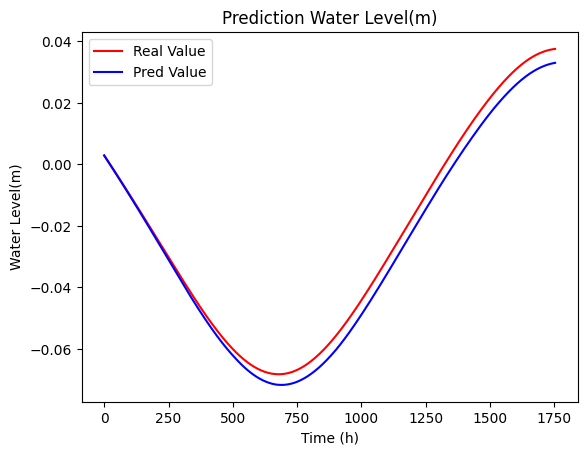

MSE: 1.423891650843738e-05
MAE: 0.0033692357458348487
R²: 0.9874930781145804
RMSE: 0.003773448887746776
pred_finally: [0.00290656 0.00277918 0.00265171 ... 0.03299228 0.03300728 0.03302183]
prediction_result: [0.00290656 0.00277918 0.00265171 ... 0.03299228 0.03300728 0.03302183]
lstm_y_turs: [0.00290826 0.00278261 0.00265689 ... 0.03752221 0.03753252 0.03754239]
-------------------------- 12 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 12 ------------------------------


<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/30
110/110 [==============================] - 4s 12ms/step - loss: 0.0421 - val_loss: 0.0285
Epoch 2/30
110/110 [==============================] - 1s 9ms/step - loss: 6.6180e-04 - val_loss: 0.0170
Epoch 3/30
110/110 [==============================] - 1s 8ms/step - loss: 2.6313e-04 - val_loss: 0.0180
Epoch 4/30
110/110 [==============================] - 1s 9ms/step - loss: 1.8385e-04 - val_loss: 0.0181
Epoch 5/30
110/110 [==============================] - 1s 9ms/step - loss: 1.1357e-04 - val_loss: 0.0164
Epoch 6/30
110/110 [==============================] - 1s 9ms/step - loss: 6.3558e-05 - val_loss: 0.0143
Epoch 7/30
110/110 [==============================] - 1s 9ms/step - loss: 3.9912e-05 - val_loss: 0.0124
Epoch 8/30
110/110 [==============================] - 1s 8ms/step - loss: 3.1515e-05 - val_loss: 0.0114
Epoch 9/30
110/110 [==============================] - 1s 9ms/step - loss: 2.7618e-05 - val_loss: 0.0106
Epoch 10/30
110/110 [==============================] - 1s 9ms/step 

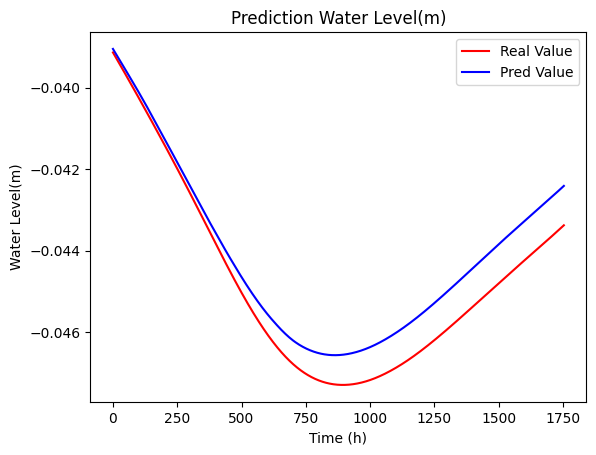

MSE: 4.898139249933531e-07
MAE: 0.0006252948609002541
R²: 0.900605703738195
RMSE: 0.0006998670766605278
pred_finally: [-0.03905277 -0.03906317 -0.03907358 ... -0.04242148 -0.04241569
 -0.0424099 ]
prediction_result: [-0.03905277 -0.03906317 -0.03907358 ... -0.04242148 -0.04241569
 -0.0424099 ]
lstm_y_turs: [-0.03913943 -0.03915028 -0.03916114 ... -0.04338668 -0.0433809
 -0.04337512]
-------------------------- 13 --------------------------
1755
(7022, 6)
(1755, 6)
trainX.Shape:---- (7021, 1, 6)
trainY.shape:---- (7021,)
testX.shape:---- (1754, 1, 6)
testY.shape:---- (1754,)
---------------------------- 13 ------------------------------


<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/30
110/110 [==============================] - 4s 10ms/step - loss: 0.0938 - val_loss: 0.0076
Epoch 2/30
110/110 [==============================] - 1s 9ms/step - loss: 0.0014 - val_loss: 0.0155
Epoch 3/30
110/110 [==============================] - 1s 8ms/step - loss: 0.0011 - val_loss: 0.0129
Epoch 4/30
110/110 [==============================] - 1s 8ms/step - loss: 8.9775e-04 - val_loss: 0.0116
Epoch 5/30
110/110 [==============================] - 1s 8ms/step - loss: 7.3161e-04 - val_loss: 0.0087
Epoch 6/30
110/110 [==============================] - 1s 8ms/step - loss: 5.6552e-04 - val_loss: 0.0057
Epoch 7/30
110/110 [==============================] - 1s 8ms/step - loss: 4.0423e-04 - val_loss: 0.0038
Epoch 8/30
110/110 [==============================] - 1s 9ms/step - loss: 2.5149e-04 - val_loss: 0.0022
Epoch 9/30
110/110 [==============================] - 1s 8ms/step - loss: 1.2641e-04 - val_loss: 7.3204e-04
Epoch 10/30
110/110 [==============================] - 1s 8ms/step - lo

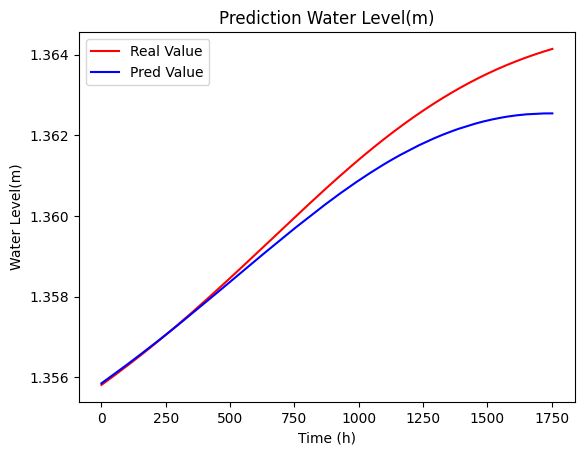

MSE: 5.020532748746535e-07
MAE: 0.0005208942552904681
R²: 0.9256735784116482
RMSE: 0.0007085571782676776
pred_finally: [1.355851  1.3558555 1.3558601 ... 1.3625436 1.3625436 1.3625436]
prediction_result: [1.355851  1.3558555 1.3558601 ... 1.3625436 1.3625436 1.3625436]
lstm_y_turs: [1.35581058 1.3558152  1.35581982 ... 1.36413848 1.36414037 1.36414225]
CPU times: total: 3h 3min 59s
Wall time: 1h 5min 42s


In [5]:
%%time
import tensorflow as tf
#BiLSTM
#     def BiLSTM():
#         model = Sequential()
#         model.add(Bidirectional(LSTM(200, activation='relu'), input_shape=(1, 6)))
#         model.add(Dense(1))
#         model.compile(optimizer='adam', loss='mse')
#         return model
#     # history = BiLSTM_Model.fit(trainX,trainY,epochs=30,verbose=1,validation_data=(testX, testY))
#     BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))
#     Model_Name_Three = 'BiLSTM_Model'
#     BiLSTM_Model.fit(trainX,trainY)
#     Result_Ana(BiLSTM_Model,6,Model_Name_Three)
# Check if GPU is available and set the GPU device
if tf.test.is_gpu_available():
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
imf_choose = 0
finally_rsult = []
finally_y_true = []
#int(len(IMF)/6)
for imf_run in range(int(len(IMF) / 6)):
    ALL_Factor_IMF = IMF[imf_choose:imf_choose+6][:]
    imf_choose = imf_choose + 6
    # imf_choose = imf_choose + 6
    print('--------------------------',imf_run,'--------------------------')
    # IMF[imf_run] = ALL_Factor_IMF
    # print("ALL_Factor_IMF:",ALL_Factor_IMF)
    ALL_Factor_IMF = np.array(ALL_Factor_IMF)
    IMF_Input = np.transpose(ALL_Factor_IMF)
    # print(IMF_Input)

    #[AT,Baro,WD,WG,WL,WS]
    IMF_Input
    df_IMF = pd.DataFrame(IMF_Input)
    # df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF = df_IMF[['WS','WL','WG','AT','Baro','WL']]
    # print(df_IMF)

    # 数据范围过大，对数据进行归一化
    scaler = MinMaxScaler(feature_range=(0, 1))
    df = scaler.fit_transform(df_IMF)

    #数据集划分
    test_split = round(len(df) * 0.20)
    print(test_split)
    def splitData(var, per_test):
        num_test = int(len(var) * per_test)
        train_size = int(len(var) - num_test)
        train_data = var[0:train_size]
        test_data = var[train_size:train_size + num_test]
        return train_data, test_data
    df_training, df_testing = splitData(df, 0.2)
    print(df_training.shape)
    print(df_testing.shape)

    def createXY(dataset, n_past):
        data_X = []
        data_Y = []
        for i in range(n_past, len(dataset)):
            data_X.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            data_Y.append(dataset[i, 5])

        return np.array(data_X), np.array(data_Y)


    trainX, trainY = createXY(df_training, 1)
    testX, testY = createXY(df_testing, 1)

    print('trainX.Shape:----', trainX.shape)
    print('trainY.shape:----', trainY.shape)
    print('testX.shape:----', testX.shape)
    print('testY.shape:----', testY.shape)
    print('----------------------------',imf_run,'------------------------------')
    def BiLSTM(optimizer='adam', batch_size=32, epochs=40):
        model = Sequential()
        model.add(Bidirectional(LSTM(200, activation='relu'), input_shape=(1, 6)))
        model.add(Dense(1))
        model.compile(optimizer=optimizer, loss='mse')
        return model
    # history = BiLSTM_Model.fit(trainX,trainY,epochs=30,verbose=1,validation_data=(testX, testY))
    BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))
    # def N_LSTM(optimizer='adam', batch_size=32, epochs=40):
    #     model = Sequential()
    #     model.add(LSTM(200, activation='relu', input_shape=(1, 6)))
    #     # optimizer = Adam()  # 设置为您希望的学习率
    #     model.add(Dense(1))
    #     model.compile(optimizer=optimizer, loss='mse')
    #     return model
    #
    #
    # N_LSTM_Model = KerasRegressor(N_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))

    from sklearn.model_selection import GridSearchCV

    # 定义超参数搜索范围
    param_grid = {
        'optimizer': ['adam'],
        'batch_size': [32, 64],
        'epochs': [30, 50]
    }

    # 执行网格搜索
    grid = GridSearchCV(estimator=BiLSTM_Model, param_grid=param_grid, cv=2)
    grid_result = grid.fit(trainX, trainY)

    best_model = grid_result.best_estimator_

    y_trues,prediction_result = Result_Ana(best_model, 6)

    print('prediction_result:',prediction_result)
    finally_rsult.append(prediction_result)
    print('lstm_y_turs:',y_trues)
    finally_y_true.append(y_trues)

In [6]:
# WL(Water Level(m)) For IMF1-IMF13-R True Value
finally_y_true

[array([0.11360713, 0.21314858, 0.3050885 , ..., 0.25443378, 0.42630158,
        0.47881946]),
 array([0.01618017, 0.03013167, 0.02211249, ..., 0.01143001, 0.04727639,
        0.1013928 ]),
 array([0.02204645, 0.30776679, 0.50702586, ..., 0.18070221, 0.31081457,
        0.32220905]),
 array([ 0.00162487,  0.0415722 ,  0.0426443 , ..., -0.03505092,
        -0.00922992,  0.00881298]),
 array([ 0.14654971,  0.16163307,  0.16559117, ..., -0.02793743,
        -0.02695628, -0.02455443]),
 array([0.04406377, 0.04447471, 0.04276618, ..., 0.01055452, 0.01201398,
        0.01202596]),
 array([-0.0032455 , -0.00394057, -0.00454056, ...,  0.04566027,
         0.04440912,  0.04284824]),
 array([-0.04046229, -0.04184348, -0.04318783, ...,  0.08021263,
         0.07979667,  0.07929176]),
 array([-0.02283807, -0.02351739, -0.02417714, ..., -0.04998947,
        -0.04972992, -0.0494741 ]),
 array([-0.03977298, -0.0395576 , -0.03933897, ..., -0.1115579 ,
        -0.11125217, -0.11094142]),
 array([0.0466

In [7]:
finally_ytrue_r = np.array(finally_y_true)

In [8]:
finally_ytrue_r

array([[ 0.11360713,  0.21314858,  0.3050885 , ...,  0.25443378,
         0.42630158,  0.47881946],
       [ 0.01618017,  0.03013167,  0.02211249, ...,  0.01143001,
         0.04727639,  0.1013928 ],
       [ 0.02204645,  0.30776679,  0.50702586, ...,  0.18070221,
         0.31081457,  0.32220905],
       ...,
       [ 0.00290826,  0.00278261,  0.00265689, ...,  0.03752221,
         0.03753252,  0.03754239],
       [-0.03913943, -0.03915028, -0.03916114, ..., -0.04338668,
        -0.0433809 , -0.04337512],
       [ 1.35581058,  1.3558152 ,  1.35581982, ...,  1.36413848,
         1.36414037,  1.36414225]])

In [9]:
ALL_Factor_ReIMFS_Yture_Result = np.transpose(finally_ytrue_r)

In [10]:
ALL_Factor_ReIMFS_Yture_Result

array([[ 0.11360713,  0.01618017,  0.02204645, ...,  0.00290826,
        -0.03913943,  1.35581058],
       [ 0.21314858,  0.03013167,  0.30776679, ...,  0.00278261,
        -0.03915028,  1.3558152 ],
       [ 0.3050885 ,  0.02211249,  0.50702586, ...,  0.00265689,
        -0.03916114,  1.35581982],
       ...,
       [ 0.25443378,  0.01143001,  0.18070221, ...,  0.03752221,
        -0.04338668,  1.36413848],
       [ 0.42630158,  0.04727639,  0.31081457, ...,  0.03753252,
        -0.0433809 ,  1.36414037],
       [ 0.47881946,  0.1013928 ,  0.32220905, ...,  0.03754239,
        -0.04337512,  1.36414225]])

In [11]:
finally_column_names = ["IMF1", "IMF2", "IMF3", "IMF4", "IMF5", "IMF6", "IMF7", "IMF8", "IMF9", "IMF10", "IMF11",
                        "IMF12", "IMF13", "Residual"]
all_factor_ceemdan_true = pd.DataFrame(ALL_Factor_ReIMFS_Yture_Result, columns=finally_column_names)

In [12]:
all_factor_ceemdan_true

IMF1      IMF2      IMF3      IMF4      IMF5      IMF6      IMF7  \
0     0.113607  0.016180  0.022046  0.001625  0.146550  0.044064 -0.003245   
1     0.213149  0.030132  0.307767  0.041572  0.161633  0.044475 -0.003941   
2     0.305088  0.022112  0.507026  0.042644  0.165591  0.042766 -0.004541   
3     0.336898  0.022953  0.559352  0.052262  0.157109  0.038980 -0.005033   
4     0.215551  0.026308  0.444105  0.073798  0.135550  0.033373 -0.005408   
...        ...       ...       ...       ...       ...       ...       ...   
1749 -0.241016 -0.059370 -0.309643 -0.087668 -0.018808  0.004649  0.047235   
1750 -0.028331 -0.016013 -0.088134 -0.055755 -0.025255  0.007932  0.046599   
1751  0.254434  0.011430  0.180702 -0.035051 -0.027937  0.010555  0.045660   
1752  0.426302  0.047276  0.310815 -0.009230 -0.026956  0.012014  0.044409   
1753  0.478819  0.101393  0.322209  0.008813 -0.024554  0.012026  0.042848   

          IMF8      IMF9     IMF10     IMF11     IMF12     IMF13  Residual  
0    -0.040462 -0.022838 -0.039773  0.046667  0.002908 -0.039139  1.355811  
1    -0.041843 -0.023517 -0.039558  0.046684  0.002783 -0.039150  1.355815  
2    -0.043188 -0.024177 -0.039339  0.046700  0.002657 -0.039161  1.355820  
3    -0.044487 -0.024816 -0.039117  0.046715  0.002531 -0.039172  1.355824  
4    -0.045730 -0.025434 -0.038892  0.046729  0.002405 -0.039183  1.355829  
...        ...       ...       ...       ...       ...       ...       ...  
1749  0.080780 -0.050520 -0.112154  0.032278  0.037500 -0.043398  1.364135  
1750  0.080540 -0.050253 -0.111859  0.032273  0.037511 -0.043392  1.364137  
1751  0.080213 -0.049989 -0.111558  0.032268  0.037522 -0.043387  1.364138  
1752  0.079797 -0.049730 -0.111252  0.032264  0.037533 -0.043381  1.364140  
1753  0.079292 -0.049474 -0.110941  0.032260  0.037542 -0.043375  1.364142  

[1754 rows x 14 columns]

In [13]:
# 保存为CSV文件
all_factor_ceemdan_true.to_csv("BiLSTM_ALL_Burlington_Factor_True_ReIMFS_Result_13IMFs_R.csv", index=False)

In [14]:
# WL(Water Level(m)) IMF1-IMF13-R Prediction Value
finally_rsult

[array([-0.11718611,  0.09876042,  0.18728761, ..., -0.0385297 ,
         0.22785549,  0.35467952], dtype=float32),
 array([-0.0091138 ,  0.01249125,  0.02519897, ..., -0.01492591,
         0.00877683,  0.03955961], dtype=float32),
 array([-0.18978406,  0.02909498,  0.30293965, ..., -0.05905765,
         0.19624054,  0.29769203], dtype=float32),
 array([-0.06018895, -0.00749746,  0.02718377, ..., -0.05421852,
        -0.03587951, -0.01331313], dtype=float32),
 array([ 0.1367198 ,  0.16246472,  0.17479254, ..., -0.00496678,
        -0.00847003, -0.00844803], dtype=float32),
 array([0.04065335, 0.04327822, 0.04388131, ..., 0.01222381, 0.01502011,
        0.01648984], dtype=float32),
 array([-0.00157146, -0.00227929, -0.0029465 , ...,  0.04546404,
         0.0445432 ,  0.04330248], dtype=float32),
 array([-0.03883619, -0.04016062, -0.04145214, ...,  0.07868817,
         0.07837337,  0.07797936], dtype=float32),
 array([-0.0216117 , -0.02229752, -0.02298182, ..., -0.0489223 ,
        -0.04

In [15]:
finally_r = np.array(finally_rsult)

In [16]:
finally_r

array([[-0.11718611,  0.09876042,  0.18728761, ..., -0.0385297 ,
         0.22785549,  0.35467952],
       [-0.0091138 ,  0.01249125,  0.02519897, ..., -0.01492591,
         0.00877683,  0.03955961],
       [-0.18978406,  0.02909498,  0.30293965, ..., -0.05905765,
         0.19624054,  0.29769203],
       ...,
       [ 0.00290656,  0.00277918,  0.00265171, ...,  0.03299228,
         0.03300728,  0.03302183],
       [-0.03905277, -0.03906317, -0.03907358, ..., -0.04242148,
        -0.04241569, -0.0424099 ],
       [ 1.355851  ,  1.3558555 ,  1.3558601 , ...,  1.3625436 ,
         1.3625436 ,  1.3625436 ]], dtype=float32)

In [17]:
ALL_Factor_ReIMFS_Result = np.transpose(finally_r)

In [18]:
ALL_Factor_ReIMFS_Result

array([[-0.11718611, -0.0091138 , -0.18978406, ...,  0.00290656,
        -0.03905277,  1.355851  ],
       [ 0.09876042,  0.01249125,  0.02909498, ...,  0.00277918,
        -0.03906317,  1.3558555 ],
       [ 0.18728761,  0.02519897,  0.30293965, ...,  0.00265171,
        -0.03907358,  1.3558601 ],
       ...,
       [-0.0385297 , -0.01492591, -0.05905765, ...,  0.03299228,
        -0.04242148,  1.3625436 ],
       [ 0.22785549,  0.00877683,  0.19624054, ...,  0.03300728,
        -0.04241569,  1.3625436 ],
       [ 0.35467952,  0.03955961,  0.29769203, ...,  0.03302183,
        -0.0424099 ,  1.3625436 ]], dtype=float32)

In [19]:
finally_column_names = ["IMF1", "IMF2", "IMF3", "IMF4", "IMF5", "IMF6", "IMF7", "IMF8", "IMF9", "IMF10", "IMF11", "IMF12","IMF13","Residual"]

In [20]:
all_factor_ceemdan_prediction = pd.DataFrame(ALL_Factor_ReIMFS_Result,columns=finally_column_names)

In [21]:
all_factor_ceemdan_prediction

IMF1      IMF2      IMF3      IMF4      IMF5      IMF6      IMF7  \
0    -0.117186 -0.009114 -0.189784 -0.060189  0.136720  0.040653 -0.001571   
1     0.098760  0.012491  0.029095 -0.007497  0.162465  0.043278 -0.002279   
2     0.187288  0.025199  0.302940  0.027184  0.174793  0.043881 -0.002947   
3     0.265459  0.018127  0.490239  0.029908  0.174324  0.042290 -0.003522   
4     0.288717  0.018786  0.529781  0.041833  0.161287  0.038558 -0.004006   
...        ...       ...       ...       ...       ...       ...       ...   
1749 -0.349332 -0.074887 -0.370084 -0.105782  0.009096  0.004651  0.046382   
1750 -0.260559 -0.050080 -0.251769 -0.081810  0.001815  0.008640  0.046076   
1751 -0.038530 -0.014926 -0.059058 -0.054219 -0.004967  0.012224  0.045464   
1752  0.227855  0.008777  0.196241 -0.035880 -0.008470  0.015020  0.044543   
1753  0.354680  0.039560  0.297692 -0.013313 -0.008448  0.016490  0.043302   

          IMF8      IMF9     IMF10     IMF11     IMF12     IMF13  Residual  
0    -0.038836 -0.021612 -0.039041  0.046726  0.002907 -0.039053  1.355851  
1    -0.040161 -0.022298 -0.038821  0.046742  0.002779 -0.039063  1.355855  
2    -0.041452 -0.022982 -0.038597  0.046757  0.002652 -0.039074  1.355860  
3    -0.042708 -0.023650 -0.038370  0.046771  0.002524 -0.039084  1.355865  
4    -0.043922 -0.024297 -0.038140  0.046784  0.002397 -0.039094  1.355869  
...        ...       ...       ...       ...       ...       ...       ...  
1749  0.079088 -0.049428 -0.111495  0.032692  0.032961 -0.042433  1.362544  
1750  0.078925 -0.049173 -0.111211  0.032685  0.032977 -0.042427  1.362544  
1751  0.078688 -0.048922 -0.110922  0.032679  0.032992 -0.042421  1.362544  
1752  0.078373 -0.048676 -0.110627  0.032673  0.033007 -0.042416  1.362544  
1753  0.077979 -0.048434 -0.110327  0.032668  0.033022 -0.042410  1.362544  

[1754 rows x 14 columns]

In [22]:
# 保存为CSV文件
all_factor_ceemdan_prediction.to_csv("BiLSTM_ALL_Burlington_ALL_Factor_ReIMFS_Result_13_Two_Execute_IMFs_R.csv", index=False)

### 验证最终结果

In [24]:
df = pd.read_csv('BiLSTM_ALL_Burlington_ALL_Factor_ReIMFS_Result_13_Two_Execute_IMFs_R.csv')
df = df[['Pred']]

In [25]:
df

Pred
0     1.066471
1     1.601348
2     2.021502
3     2.278172
4     2.334551
...        ...
1749  0.463971
1750  0.716633
1751  1.190627
1752  1.752965
1753  2.035004

[1754 rows x 1 columns]

In [26]:
origin = pd.read_csv('../../Data/NOAA/All Station/Burlington Station.csv')
y_true = origin['Water Level(m)']

In [27]:
#数据集划分
# test_split = round(len(y_true) * 0.20)
# print(test_split)
test_split = round(len(y_true) * 0.20)
print(test_split)

def splitData(var, per_test):
    num_test = int(len(var) * per_test)
    train_size = int(len(var) - num_test)
    train_data = var[0:train_size]
    test_data = var[train_size:train_size + num_test]
    return train_data, test_data


df_training, df_testing = splitData(y_true, 0.2)
print(df_training.shape)
print(df_testing.shape)


print("df_testing.shape",len(df_testing))

def createXY(dataset, n_past):
    data_X = []
    data_Y = []
    for i in range(n_past, len(dataset)):
        data_X.append(dataset[i - n_past:i])
        data_Y.append(dataset[i:i+1])

    return np.array(data_X), np.array(data_Y)


# trainX, trainY = createXY(df_training, 1)
testX, testY = createXY(df_testing, 1)

# print('trainX.Shape:----', trainX.shape)
# print('trainY.shape:----', trainY.shape)
print('testX.shape:----', testX.shape)
print('testY.shape:----', testY.shape)
testY

1755
(7022,)
(1755,)
df_testing.shape 1755
testX.shape:---- (1754, 1)
testY.shape:---- (1754, 1)


array([[1.604],
       [2.056],
       [2.34 ],
       ...,
       [1.749],
       [2.114],
       [2.251]])

In [28]:
y_true = testY[0:1753]
pred = df[1:1754]

In [29]:
y_true

array([[1.604],
       [2.056],
       [2.34 ],
       ...,
       [1.15 ],
       [1.749],
       [2.114]])

In [30]:
pred

Pred
1     1.601348
2     2.021502
3     2.278172
4     2.334551
5     2.124843
...        ...
1749  0.463971
1750  0.716633
1751  1.190627
1752  1.752965
1753  2.035004

[1753 rows x 1 columns]

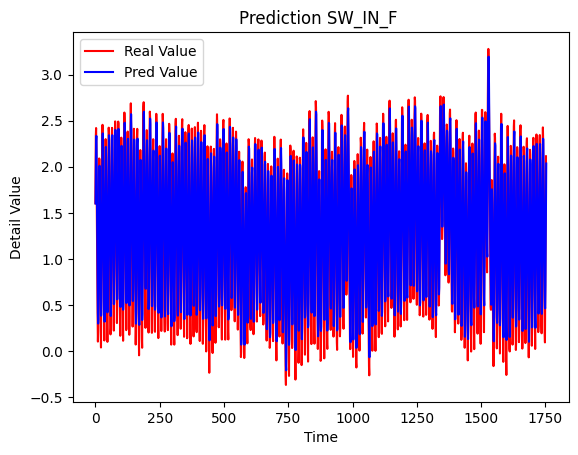

MSE: 0.01081509706914255
MAE: 0.07903792204677695
R²: 0.9820210706063769
RMSE: 0.1039956588956604
pred_finally:           Pred
1     1.601348
2     2.021502
3     2.278172
4     2.334551
5     2.124843
...        ...
1749  0.463971
1750  0.716633
1751  1.190627
1752  1.752965
1753  2.035004

[1753 rows x 1 columns]


In [31]:

plt.plot(y_true, color='red', label='Real Value')
plt.plot(pred, color='blue', label='Pred Value')
plt.title('Prediction SW_IN_F ')
plt.xlabel('Time')
plt.ylabel('Detail Value')
plt.legend()
# plt.savefig('../Images/SW_IN_F_Train_'+'n_past='+'{}'.format((trainX[1].shape)[0])+'_epochs={}'.format((grid_search.best_params_)['epochs'])+'.png',dpi=600)
plt.show()
# y_true_data = pd.DataFrame(y)
# y_true_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_True' + '.csv',
#               index=False)
# pred_data = pd.DataFrame(pred)
# pred_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_Pre' + '.csv',
#              index=False)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

print('MSE:', mse(y_true, pred))
print('MAE:', mae(y_true, pred))
print('R²:', r2(y_true, pred))
print('RMSE:', np.sqrt(mse(y_true, pred)))
print('pred_finally:', pred)

In [ ]:
y_pred = np.array(df).reshape(-1, 1)
#将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将结果存储在prediction_copies_array数组中
prediction_copies_array = np.repeat(y_pred, 6, axis=-1)
#prediction_copies_array
#prediction_copies_array.shape
pred = scaler.inverse_transform(np.reshape(prediction_copies_array, (len(y_pred), 6)))[:,5]  #进行逆变换但是，只需要最后一列

# print(pred)
original_copies_array = np.repeat(testY, 6, axis=-1)
y_true = scaler.inverse_transform(np.reshape(original_copies_array, (len(testY), 6)))[:, 5]
# y_true = scaler.inverse_transform(np.array(testY).reshape(-1,1))

y_true
pred
print(pred)
plt.plot(y_true, color='red', label='Real Value')
plt.plot(pred, color='blue', label='Pred Value')
plt.title('Prediction SW_IN_F ')
plt.xlabel('Time')
plt.ylabel('Detail Value')
plt.legend()
# plt.savefig('../Images/SW_IN_F_Train_'+'n_past='+'{}'.format((trainX[1].shape)[0])+'_epochs={}'.format((grid_search.best_params_)['epochs'])+'.png',dpi=600)
plt.show()
# y_true_data = pd.DataFrame(y)
# y_true_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_True' + '.csv',
#               index=False)
# pred_data = pd.DataFrame(pred)
# pred_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_Pre' + '.csv',
#              index=False)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

print('MSE:', mse(y_true, pred))
print('MAE:', mae(y_true, pred))
print('R²:', r2(y_true, pred))
print('RMSE:', np.sqrt(mse(y_true, pred)))
print('pred_finally:', pred)


In [61]:
# ALL_Factor_IMF1 = IMF[0:6][:]
# ALL_Factor_IMF1 = np.array(ALL_Factor_IMF1)
# IMF1_Input = np.transpose(ALL_Factor_IMF1)
# #[AT,Baro,WD,WG,WL,WS]
# IMF1_Input
# df_IMF1 = pd.DataFrame(IMF1_Input)
# df_IMF1.columns = ['AT','Baro','WD','WG','WL','WS']
# df_IMF1[['WS','WD','WG','AT','Baro','WL']]

## 2. Vanilla LSTM

A Vanilla LSTM is an LSTM model that has a single hidden layer of LSTM units, and an output layer used to make a prediction.

We can define a Vanilla LSTM for univariate time series forecasting as follows.

In [139]:
from torch.optim import Adam
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


# define model
def N_LSTM(optimizer='adam', batch_size=32, epochs=40):
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(1, 6)))
    # optimizer = Adam()  # 设置为您希望的学习率
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model


N_LSTM_Model = KerasRegressor(N_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))

C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_6960\1754990687.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  N_LSTM_Model = KerasRegressor(N_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


In [140]:
%%time
from sklearn.model_selection import GridSearchCV

# 定义超参数搜索范围
param_grid = {
    'optimizer': ['adam'],
    'batch_size': [32,64,128],
    'epochs': [30, 50]
}

# 执行网格搜索
grid = GridSearchCV(estimator=N_LSTM_Model, param_grid=param_grid, cv=2)
grid_result = grid.fit(trainX, trainY)

Epoch 1/30
110/110 [==============================] - 2s 3ms/step - loss: 0.0408 - val_loss: 0.0100
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0086
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0080
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0072
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0068
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0066
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0065
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0065
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0063

In [141]:
# 假设已经完成超参数优化并获得了最佳模型
best_model = grid_result.best_estimator_

# 使用最佳模型进行预测
# y_pred = best_model.predict(testX)

In [142]:
# %%time
# N_LSTM_Model.fit(trainX, trainY)

## 3. Stacked LSTM

Multiple hidden LSTM layers can be stacked one on top of another in what is referred to as a Stacked LSTM model.

An LSTM layer requires a three-dimensional input and LSTMs by default will produce a two-dimensional output as an interpretation from the end of the sequence.

We can address this by having the LSTM output a value for each time step in the input data by setting the return_sequences=True argument on the layer. This allows us to have 3D output from hidden LSTM layer as input to the next.

In [17]:
# univariate stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import keras.backend as K


# def Stack_LSTM():
#     model = Sequential()
#     model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 6)))
#     model.add(LSTM(100, activation='relu'))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mse')
#     return model
def create_model(optimizer='adam', batch_size=32, epochs=40):
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 6)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Stack_LSTM_Model = KerasRegressor(build_fn=create_model(), epochs=40, verbose=1, validation_data=(testX, testY))
Stack_LSTM_Model = KerasRegressor(create_model,verbose=1)
# history = Stack_LSTM().fit(trainX,trainY,epochs=30,verbose=1,validation_data=(testX, testY))

# Stack_LSTM_Model = KerasRegressor(Stack_LSTM,epochs=30,verbose=1, validation_data=(testX, testY))

C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_35732\4008304438.py:25: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(create_model,verbose=1)


In [18]:
from sklearn.model_selection import GridSearchCV

# 定义超参数搜索范围
param_grid = {
    'optimizer': ['adam'],
    'batch_size': [5,10,16, 32, 64],
    'epochs': [20,30, 40, 50]
}
# 执行网格搜索
grid = GridSearchCV(estimator=Stack_LSTM_Model, param_grid=param_grid, cv=2)
grid_result = grid.fit(trainX, trainY)

Epoch 1/20
702/702 [==============================] - 2s 1ms/step - loss: 0.0143
Epoch 2/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 3/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 4/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 5/20
702/702 [==============================] - 1s 971us/step - loss: 0.0045
Epoch 6/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 7/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 8/20
702/702 [==============================] - 1s 980us/step - loss: 0.0046
Epoch 9/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 10/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 11/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 12/20
702/702 [==============================] - 1s 981us/step - loss: 0.0044
Epoch 13/20
702/702

In [112]:
# 假设已经完成超参数优化并获得了最佳模型
best_model = grid_result.best_estimator_

# 使用最佳模型进行预测
y_pred = best_model.predict(testX)


351/351 [==============================] - 0s 800us/step


In [26]:
%%time
Stack_LSTM_Model.fit(trainX, trainY)

Epoch 1/40
220/220 [==============================] - 3s 3ms/step - loss: 0.0375 - val_loss: 0.0059
Epoch 2/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0055
Epoch 3/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0054
Epoch 4/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0055
Epoch 5/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 6/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0059
Epoch 7/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0064
Epoch 8/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0060
Epoch 9/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0058
Epoch 10/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0056

## 4. Bidirectional LSTM


On some sequence prediction problems, it can be beneficial to allow the LSTM model to learn the input sequence both forward and backwards and concatenate both interpretations.

This is called a Bidirectional LSTM.

We can implement a Bidirectional LSTM for univariate time series forecasting by wrapping the first hidden layer in a wrapper layer called Bidirectional.

In [243]:
# univariate bidirectional lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
import keras.backend as K


def BiLSTM():
    model = Sequential()
    model.add(Bidirectional(LSTM(200, activation='relu'), input_shape=(1, 14)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


# BiLSTM_Model = BiLSTM()
# history = BiLSTM_Model.fit(trainX,trainY,epochs=30,verbose=1,validation_data=(testX, testY))
BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))
# Access the training and validation loss values
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']

# Print the training and validation loss values for each epoch
# for epoch in range(len(train_loss)):
#     print("Epoch {}: Train Loss = {}, Val Loss = {}".format(epoch+1, train_loss[epoch], val_loss[epoch]))

C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_429876\2549510797.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))


In [244]:
%%time
BiLSTM_Model.fit(trainX, trainY)

Epoch 1/40
1039/1039 [==============================] - 4s 2ms/step - loss: 0.0119 - val_loss: 0.0096
Epoch 2/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0073 - val_loss: 0.0087
Epoch 3/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0068 - val_loss: 0.0076
Epoch 4/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0067 - val_loss: 0.0070
Epoch 5/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 6/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0064 - val_loss: 0.0068
Epoch 7/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0063 - val_loss: 0.0068
Epoch 8/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0063 - val_loss: 0.0077
Epoch 9/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0062 - val_loss: 0.0065
Epoch 10/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.006

## 5. CNN LSTM 

A convolutional neural network, or CNN for short, is a type of neural network developed for working with two-dimensional image data.

The CNN can be very effective at automatically extracting and learning features from one-dimensional sequence data such as univariate time series data.

In [ ]:
# # split a univariate sequence into samples
# def split_sequence(sequence, n_steps):
# 	X, y = list(), list()
# 	for i in range(len(sequence)):
# 		# find the end of this pattern
# 		end_ix = i + n_steps
# 		# check if we are beyond the sequence
# 		if end_ix > len(sequence)-1:
# 			break
# 		# gather input and output parts of the pattern
# 		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
# 		X.append(seq_x)
# 		y.append(seq_y)
# 	return array(X), array(y)

# # define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# # choose a number of time steps
# n_steps = 4
# # split into samples
# X, y = split_sequence(raw_seq, n_steps)
# # reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
# n_features = 1
# n_seq = 1
# n_steps = 2
# X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [11]:
# Reshape trainX and testX to (samples, timesteps, features)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))


In [ ]:
trainX.shape

In [ ]:
testX.shape

In [ ]:
trainX.shape

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten
from keras.layers import Conv1D, MaxPooling1D

# Reshape trainX and testX to (samples, timesteps, features)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[2], trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[2], testX.shape[1]))


# Define model
def CnnLSTM():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


# Train the model
CnnLSTM_Model = CnnLSTM().fit(trainX, trainY, epochs=30, verbose=1, validation_data=(testX, testY))

Epoch 1/30
784/784 [==============================] - 4s 4ms/step - loss: 0.0158 - val_loss: 0.0106
Epoch 2/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 3/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0107 - val_loss: 0.0099
Epoch 4/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0104 - val_loss: 0.0098
Epoch 5/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0102 - val_loss: 0.0098
Epoch 6/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0101 - val_loss: 0.0104
Epoch 7/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 8/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 9/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0097 - val_loss: 0.0102
Epoch 10/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0096 - val_loss: 0.0096

In [ ]:
# univariate cnn lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


# define model
def CnnLSTM():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


CnnLSTM_Model = CnnLSTM().fit(trainX, trainY, epochs=30, verbose=1, validation_data=(testX, testY))

In [ ]:
# demonstrate prediction
# x_input = array([60, 70, 80, 90])
# x_input = x_input.reshape((1, n_seq, n_steps, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# # reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
# n_features = 1
# n_seq = 2
# n_steps = 2
# X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [ ]:
X

In [ ]:
X.shape

## 6. ConvLSTM

A type of LSTM related to the CNN-LSTM is the ConvLSTM, where the convolutional reading of input is built directly into each LSTM unit.

The ConvLSTM was developed for reading two-dimensional spatial-temporal data, but can be adapted for use with univariate time series forecasting.

In [ ]:
# univariate convlstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D


# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1, 2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)
# demonstrate prediction
x_input = array([60, 70, 80, 90])
x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

* ## Multivariate LSTM Models

Multivariate time series data means data where there is more than one observation for each time step.



In [ ]:
# multivariate lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

* ##  Multi-Step LSTM Models

A time series forecasting problem that requires a prediction of multiple time steps into the future can be referred to as multi-step time series forecasting

In [ ]:
# univariate multi-step vector-output stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=50, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

* ## Encoder-Decoder LSTM


In [ ]:
# univariate multi-step encoder-decoder lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed


# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = y.reshape((y.shape[0], y.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

* ## Multivariate Multi-Step LSTM Models


In [ ]:
# multivariate multi-step stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([[70, 75], [80, 85], [90, 95]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

Reference:-  https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecastings/